Good Evening Dr.Ibrahim,<br>
Here is our submission notebook & It should show the output, If it doesn't, please click on run all only .. as it will automatically import the data from github.<br>
Thanks in advance. <br>
Team 10.

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split

## Explatory Data Analysis

| Variable | Classification |
| --- | --- |
| id | Not used in analysis |
| diagnosis | Categorical (Nominal) |
| radius_mean     | Quantitative (Continuous) |
| texture_mean | Quantitative (Continuous) |
| perimeter_mean | Quantitative (Continuous) |
| area_mean | Quantitative (Continuous) |
| smoothness_mean | Quantitative (Continuous) |
| compactness_mean | Quantitative (Continuous) |
| concavity_mean | Quantitative (Continuous) |
| concave points_mean | Quantitative (Continuous) |
| symmetry_mean | Quantitative (Continuous) |
| fractal_dimension_mean | Quantitative (Continuous) |
| radius_se | Quantitative (Continuous) |
| texture_se | Quantitative (Continuous) |
| perimeter_se | Quantitative (Continuous) |
| area_se | Quantitative (Continuous) |
| smoothness_se | Quantitative (Continuous) |
| compactness_se | Quantitative (Continuous) |
| concavity_se | Quantitative (Continuous) |
| concave points_se | Quantitative (Continuous) |
| symmetry_se | Quantitative (Continuous) |
| fractal_dimension_se | Quantitative (Continuous) |
| radius_worst | Quantitative (Continuous) |
| texture_worst | Quantitative (Continuous) |
| perimeter_worst | Quantitative (Continuous) |
| area_worst | Quantitative (Continuous) |
| smoothness_worst | Quantitative (Continuous) |
| compactness_worst | Quantitative (Continuous) |
| concavity_worst | Quantitative (Continuous) |
| concave points_worst | Quantitative (Continuous) |
| symmetry_worst | Quantitative (Continuous) |
| fractal_dimension_worst | Quantitative (Continuous) |

## Set dataset into a dataframe


In [ ]:
dfa = pd.read_csv('https://raw.githubusercontent.com/alimaged10/BreastCancer/main/breast-cancer.csv')
dfa = dfa.drop("id", axis=1)
dfa

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Cleaning the Data And Removing Outliers:

In [ ]:
def removeOutliers(data):
  data = data.select_dtypes(include='number')
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 2.5 * IQR
  upper_bound = Q3 + 2.5 * IQR
  outliers = (data < lower_bound) | (data > upper_bound)
  data = data.mask(outliers, np.nan)
  return data

df = removeOutliers(dfa)
df = df.join(dfa["diagnosis"])  # join diagnosis column
df.dropna(inplace=True)  # remove rows that contain NaN
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.18600,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.24300,0.3613,0.08758,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.16250,0.2364,0.07678,M
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.17410,0.3985,0.12440,M
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.19320,0.3063,0.08368,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,B
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,B
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,M
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,M


In [ ]:
# then in this step we are going to split out data into two pieces , first (X) is al the features without the diagnosis,
# second (y): the diagnosis column

names = [index for index, value in df.items()]
names.remove('diagnosis')

X = df[names].values
y = df['diagnosis']

##Descriptive statistics

In [ ]:
def describe(data):
  mean, median, feature_name, range, std, var =[], [], [], [], [], []
  dff = pd.DataFrame()
  for feature in data:
    feature_name.append(feature)
    mean.append(data[feature].mean())
    median.append(data[feature].median())
    range.append(data[feature].max()- data[feature].min())
    std.append(data[feature].std())
    var.append(data[feature].var())

  dff['Feature Name']=feature_name
  dff['mean']=mean
  dff['median']=median
  dff['range']=range
  dff['std']=std
  dff['var']=var
  return dff

describe(df.select_dtypes(include='number'))

,Feature Name,mean,median,range,std,var
0,radius_mean,13.755497,13.170000,16.309000,2.976553,8.859869
1,texture_mean,18.987172,18.590000,24.100000,4.133569,17.086393
2,perimeter_mean,89.184727,85.260000,115.110000,20.349294,414.093777
3,area_mean,611.265455,537.300000,1542.500000,277.892259,77224.107812
4,smoothness_mean,0.095083,0.094620,0.087170,0.013247,0.000175
5,compactness_mean,0.094748,0.085020,0.263820,0.042326,0.001792
6,concavity_mean,0.073395,0.052820,0.352300,0.061920,0.003834
7,concave points_mean,0.042425,0.030290,0.162000,0.031832,0.001013
8,symmetry_mean,0.177927,0.177600,0.157600,0.023892,0.000571
9,fractal_dimension_mean,0.061861,0.061150,0.029800,0.005619,0.000032


## Standardized data

In [ ]:
def stand(data):
  for i in range(X.shape[1]):
    data[:, i] = (data[:, i] - data[:, i].mean()) / data[:, i].std()
  return data

X = stand(X)

(495, 30)
(495,)


## Histograms of each feature after Standardization

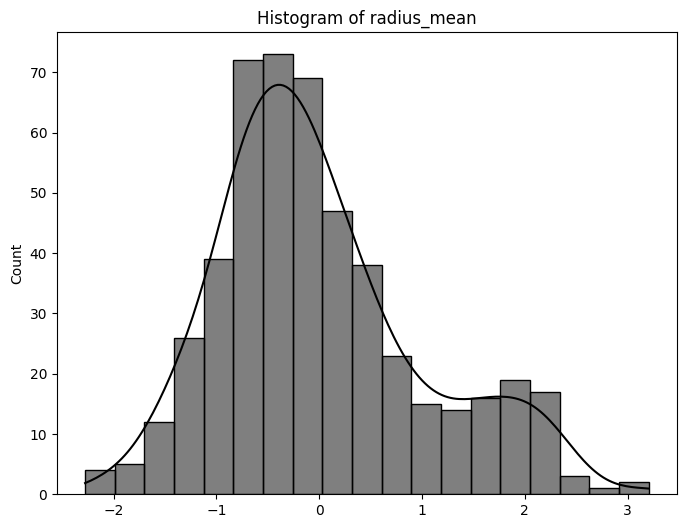

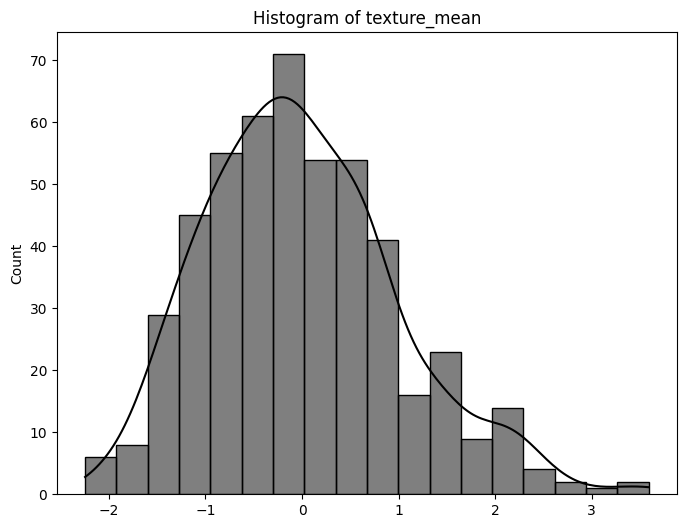

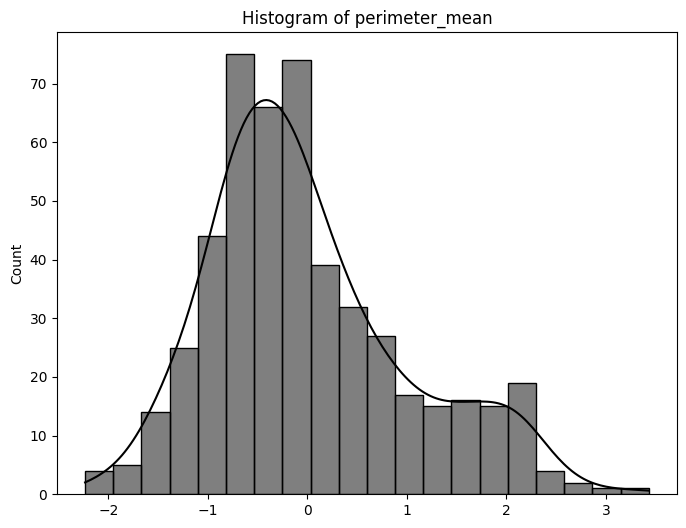

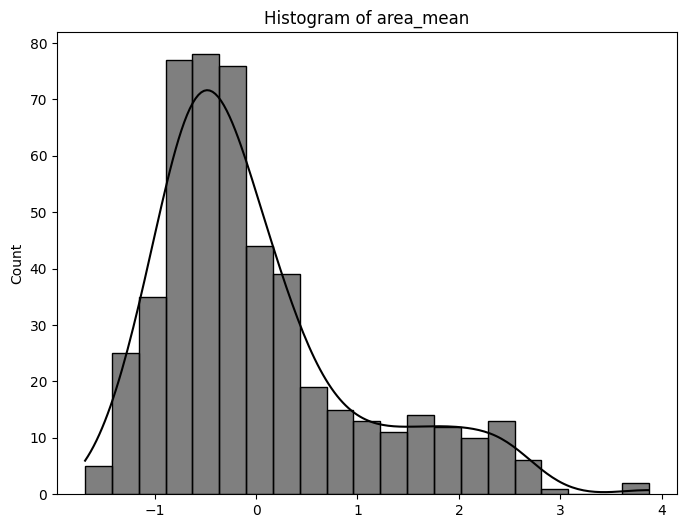

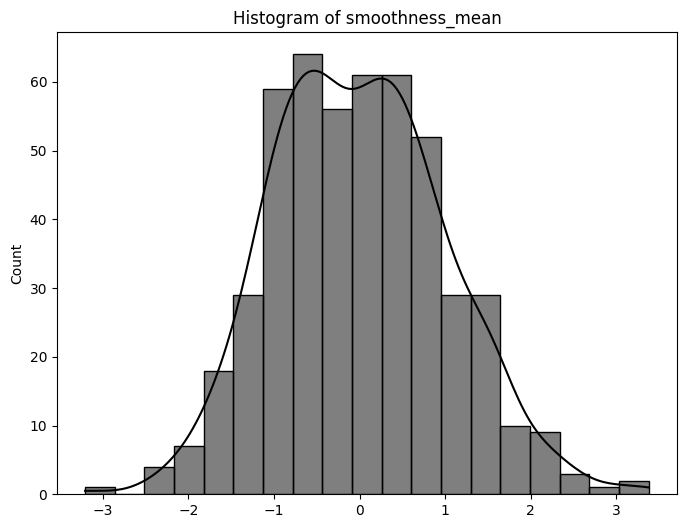

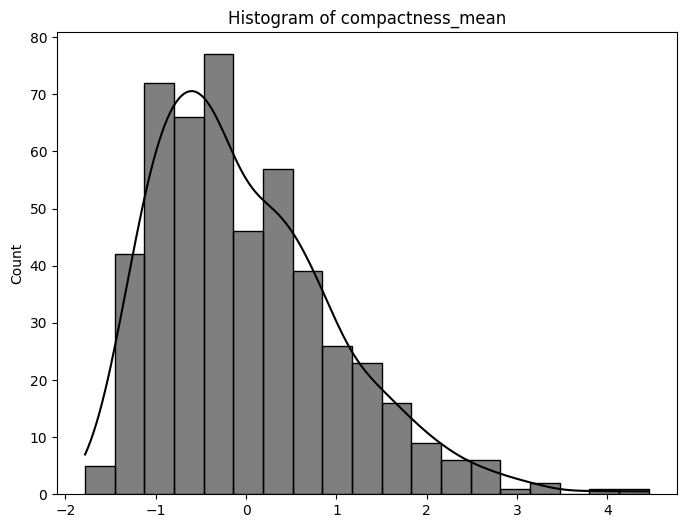

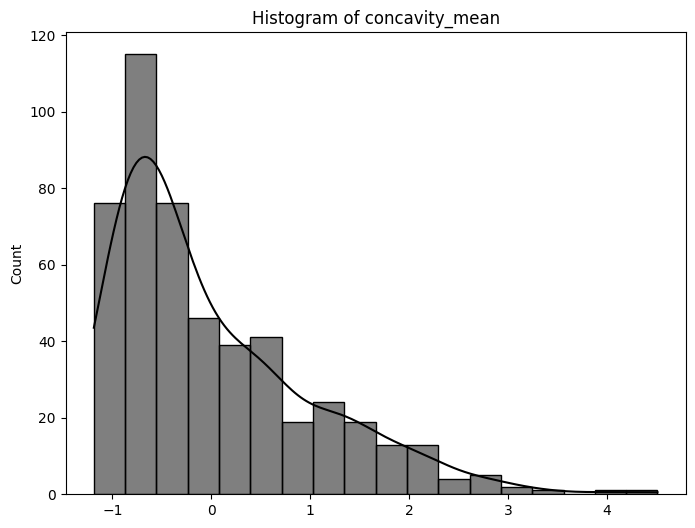

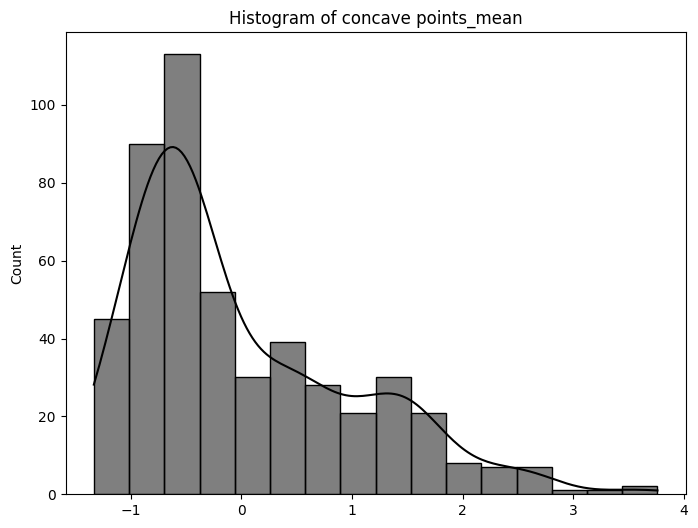

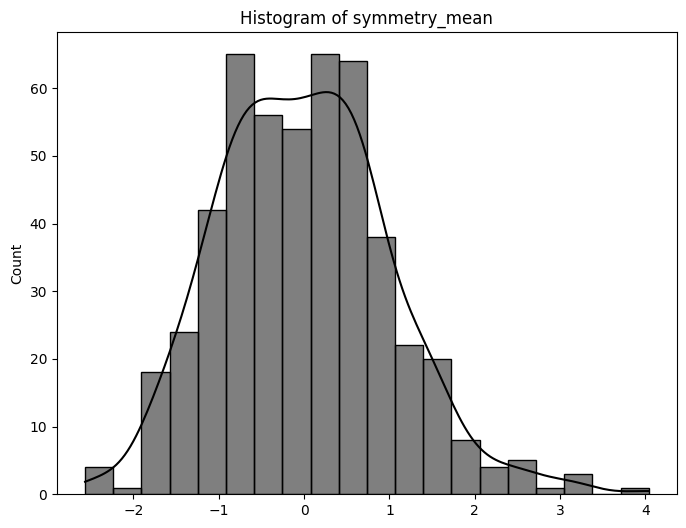

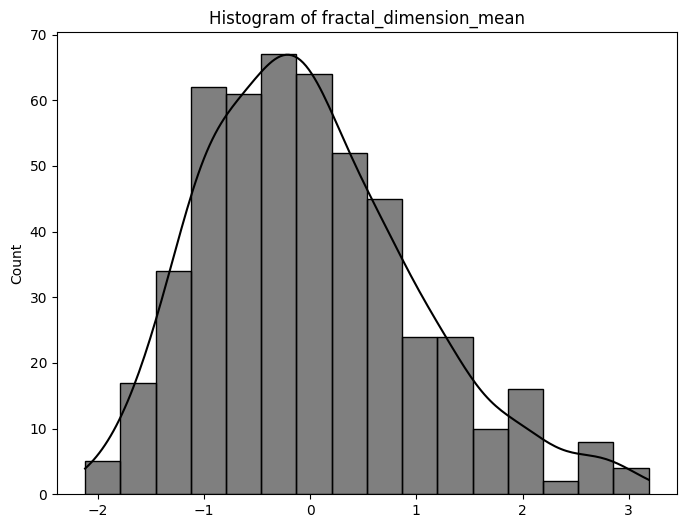

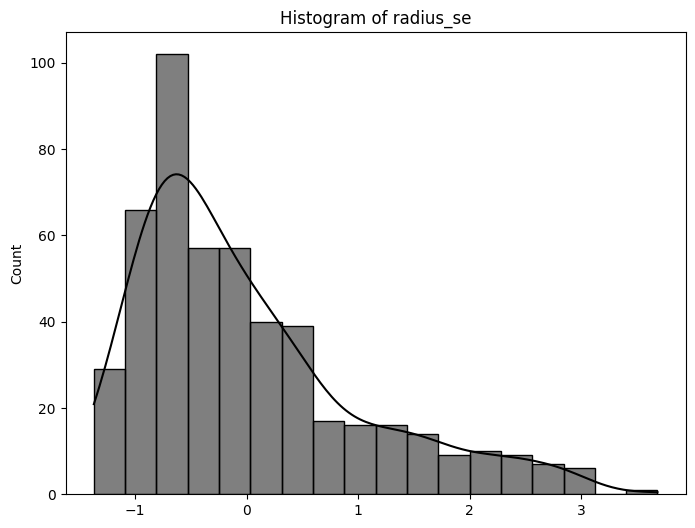

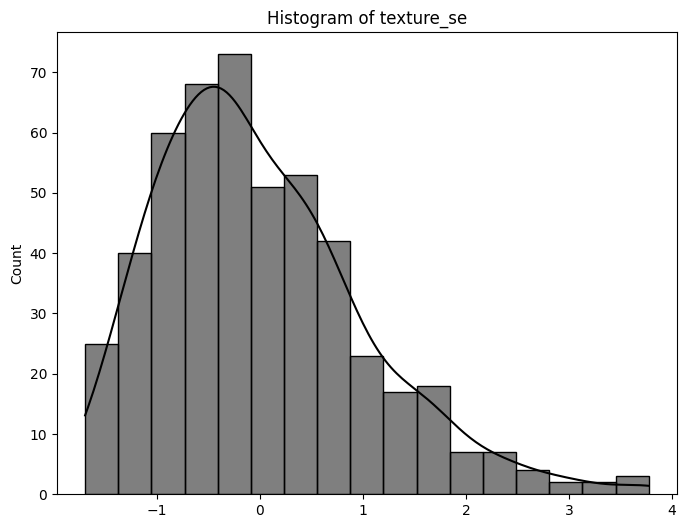

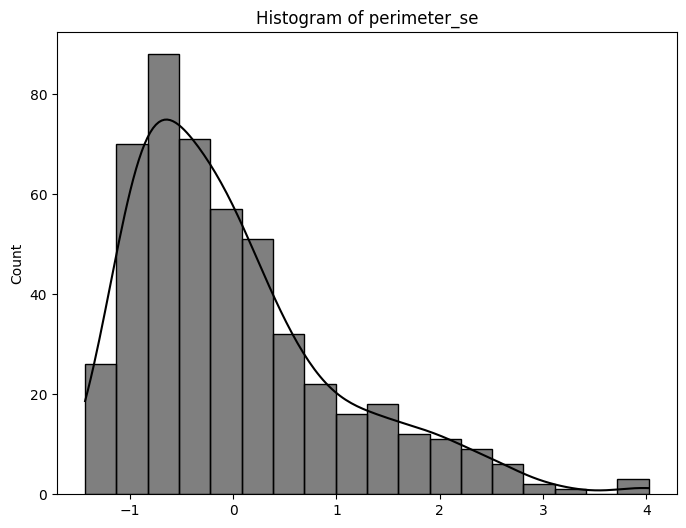

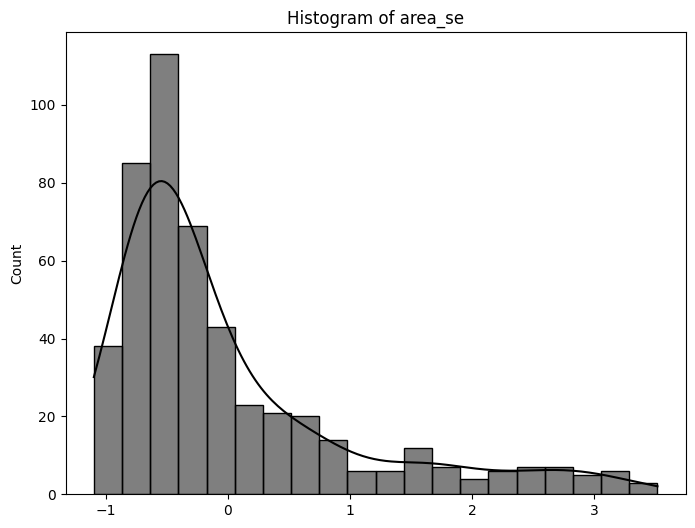

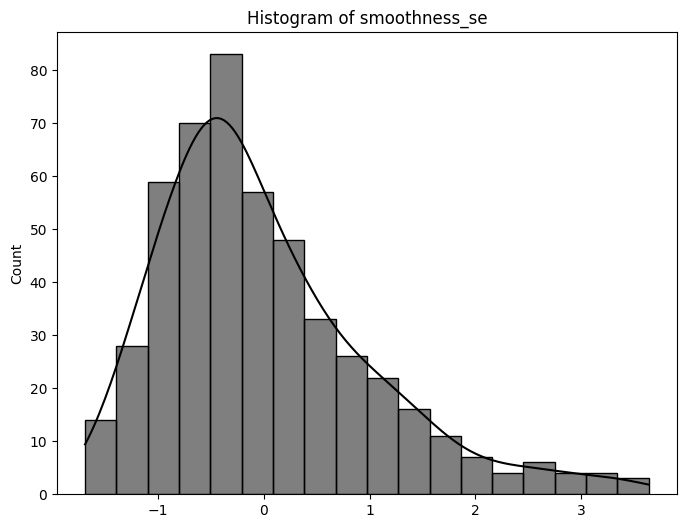

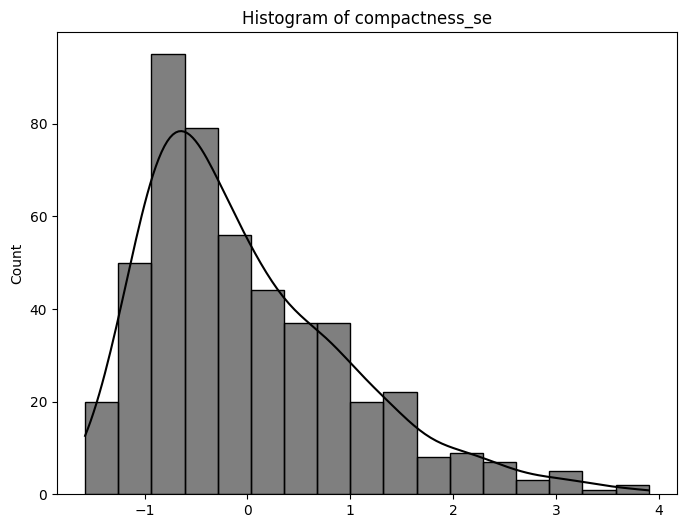

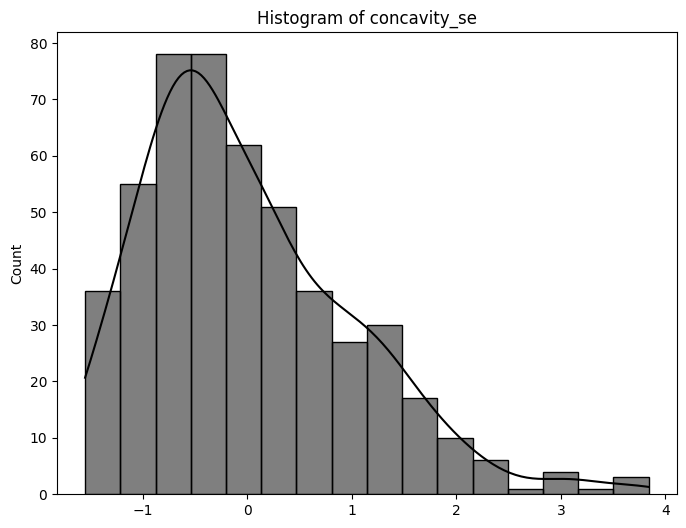

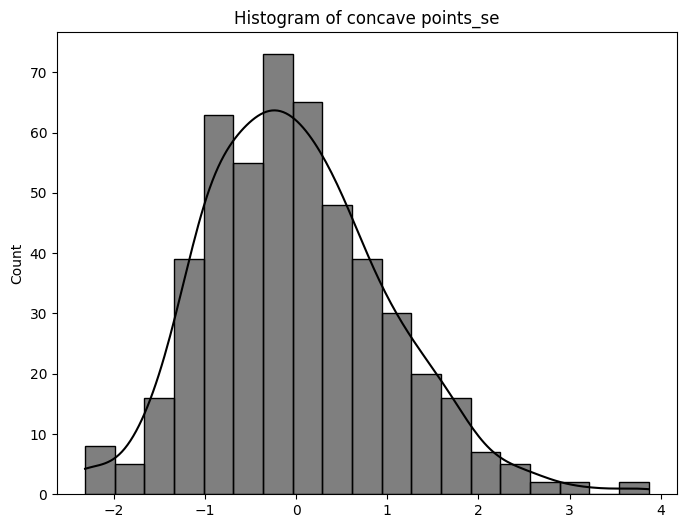

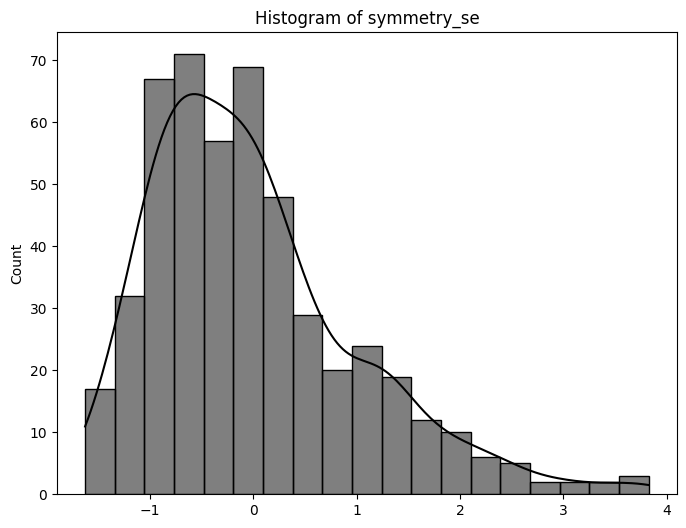

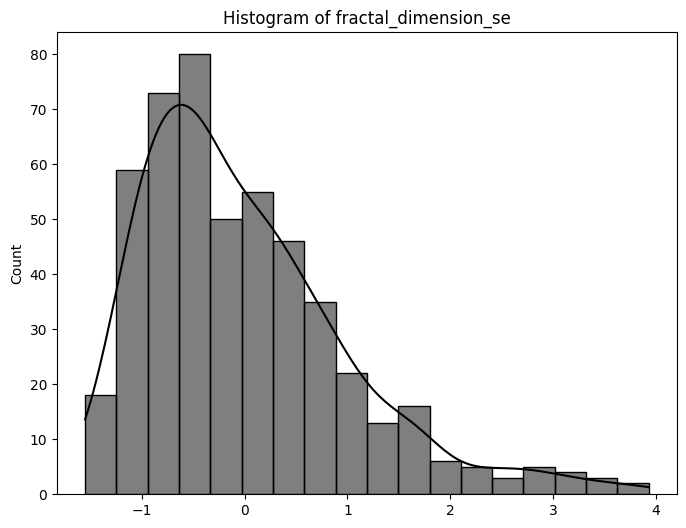

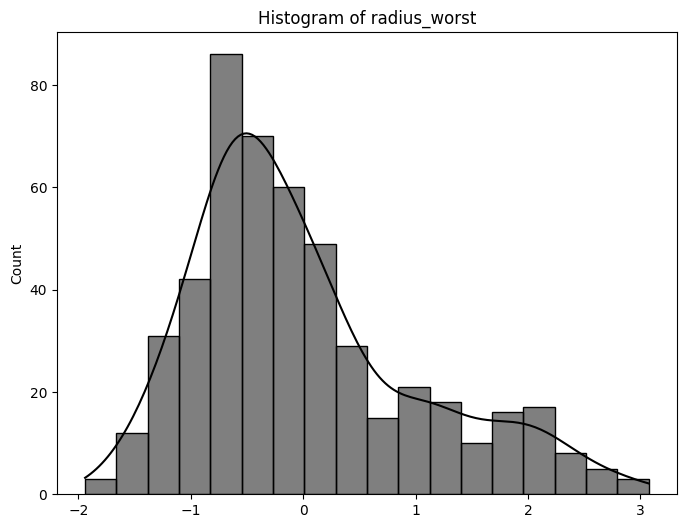

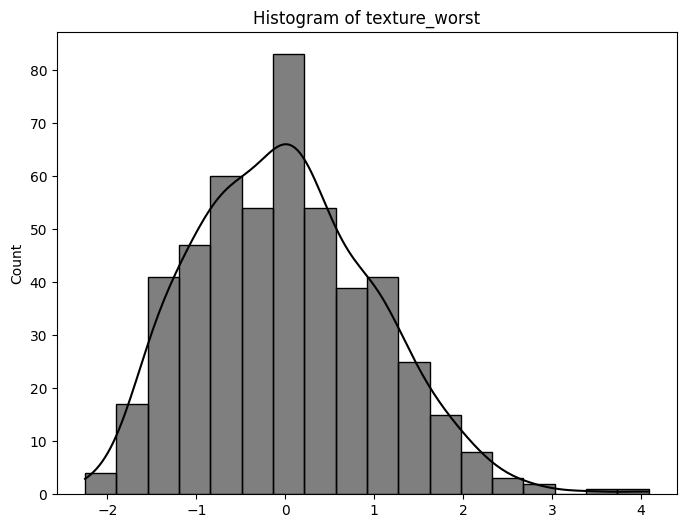

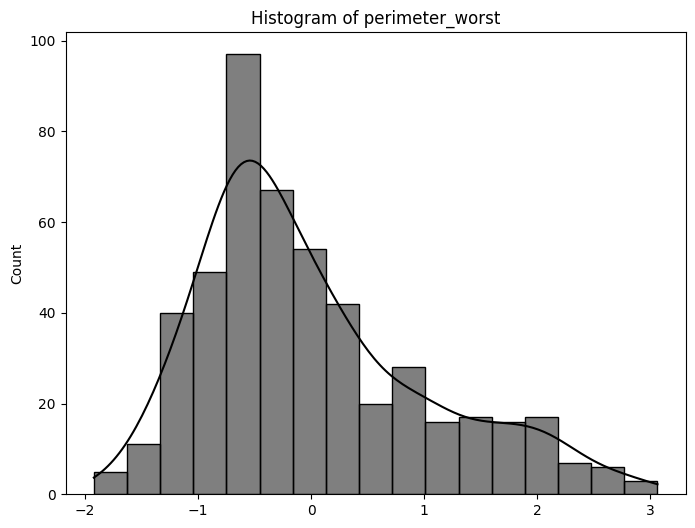

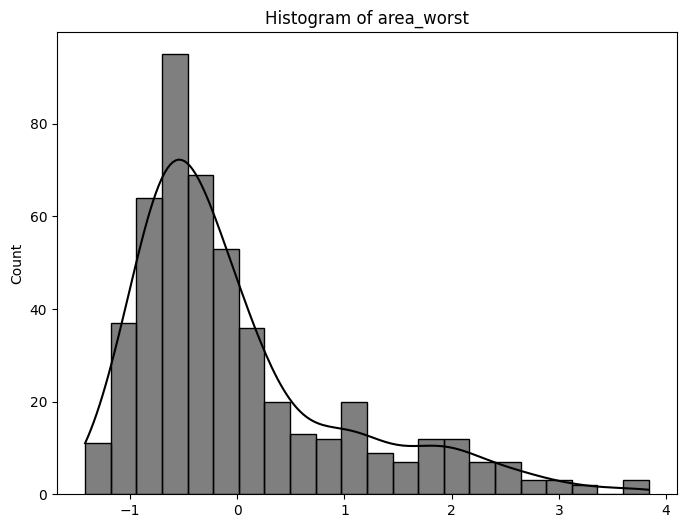

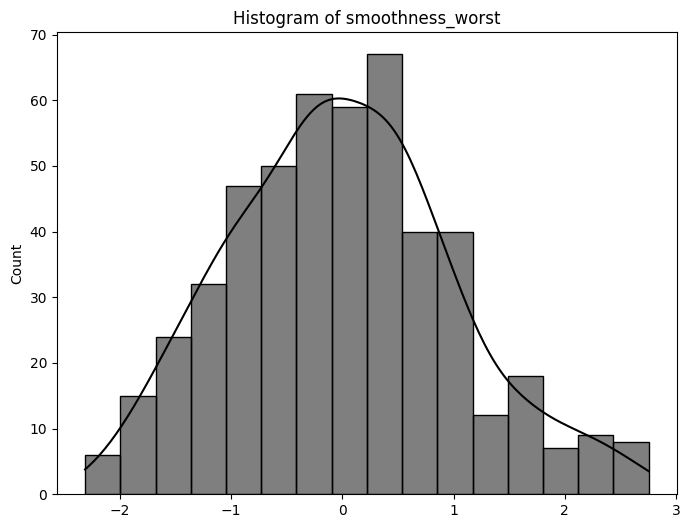

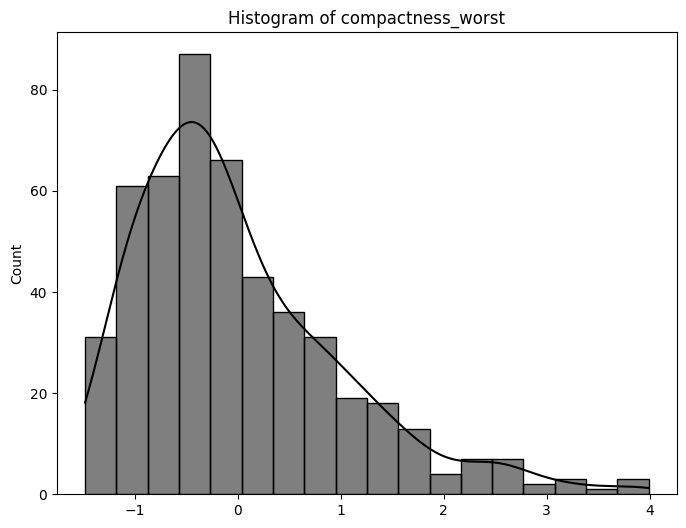

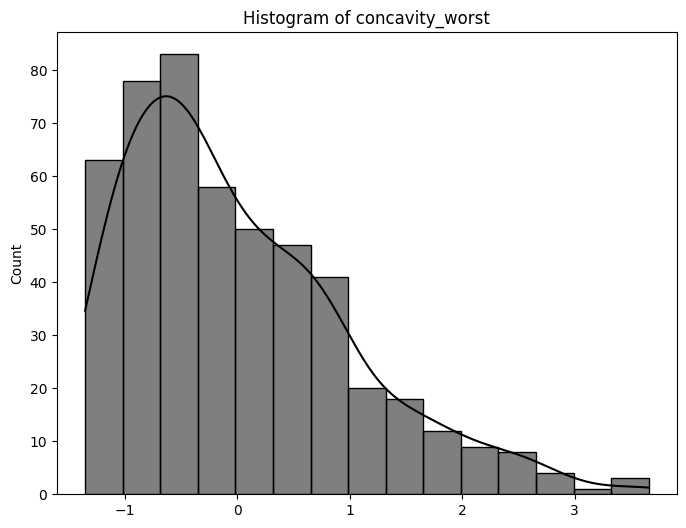

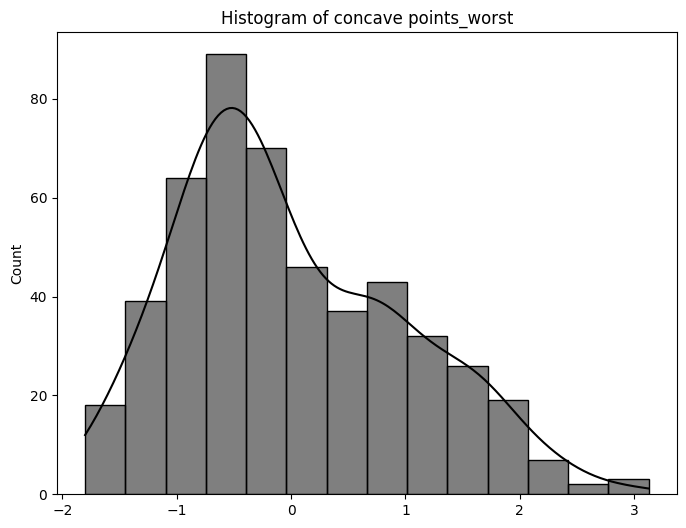

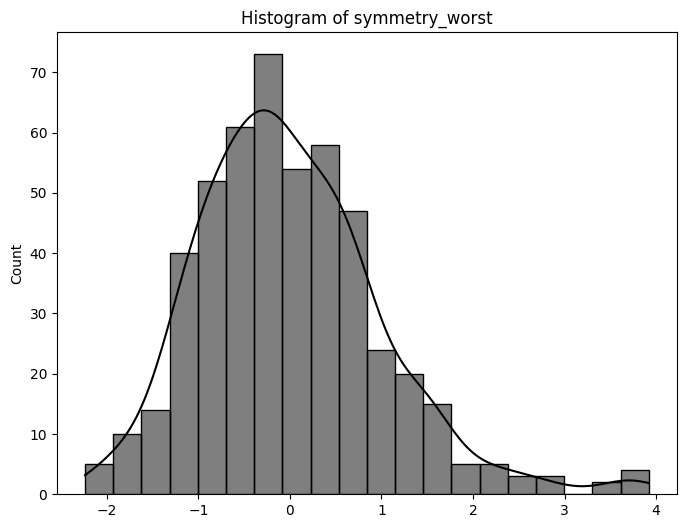

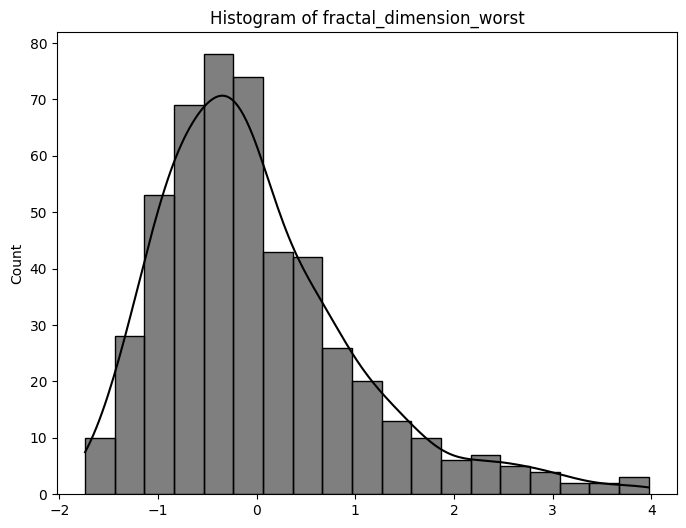

In [ ]:
# Loop over all features in the dataset
for feature in range(X.shape[1]):
    # Extract the feature
    featureData = X[:,feature]

    plt.figure(figsize=(8, 6))
    sns.histplot(data=featureData, kde=True, color='black')
    plt.title(f"Histogram of {names[feature]}")
    plt.show()

## Splitting Data

In [ ]:
# to split data into training and validation ( test ) we used sklearn bulit in function called (train_test_split)
# giving it our X , y and making test size ( validation ) 20% of the data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Histogram for Training Data:

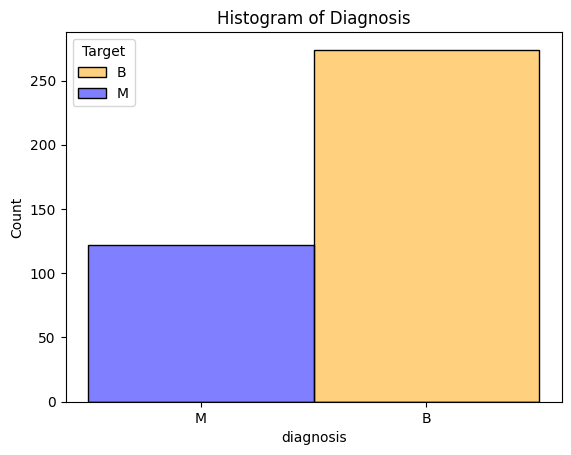

In [ ]:
# Plot a histogram of the Diagnosis
color_palette = {'M': 'blue', 'B': 'orange'}
sns.histplot(data=y_train, x=y_train, hue=y_train,palette=color_palette)
plt.title(f"Histogram of Diagnosis")
plt.legend(title='Target', labels=['B', 'M'])
plt.show()

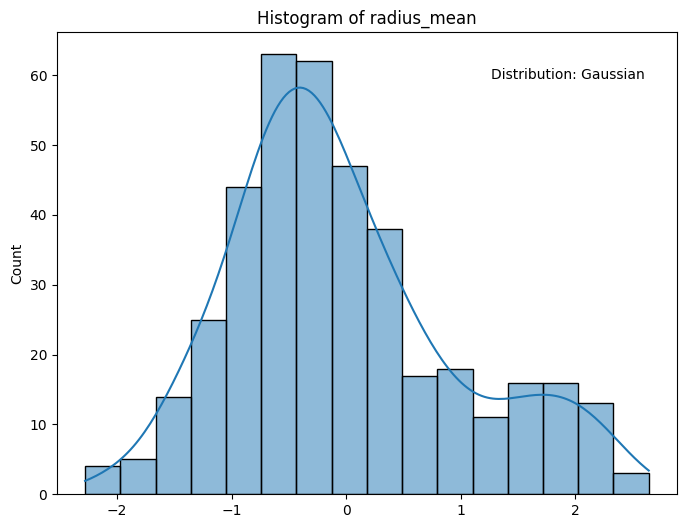

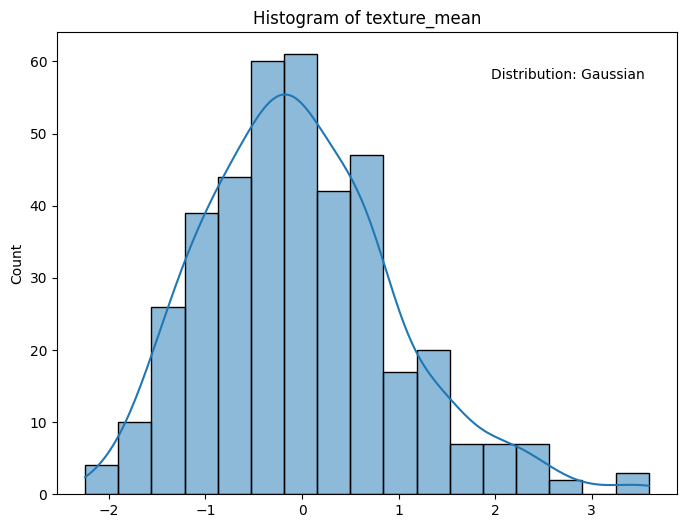

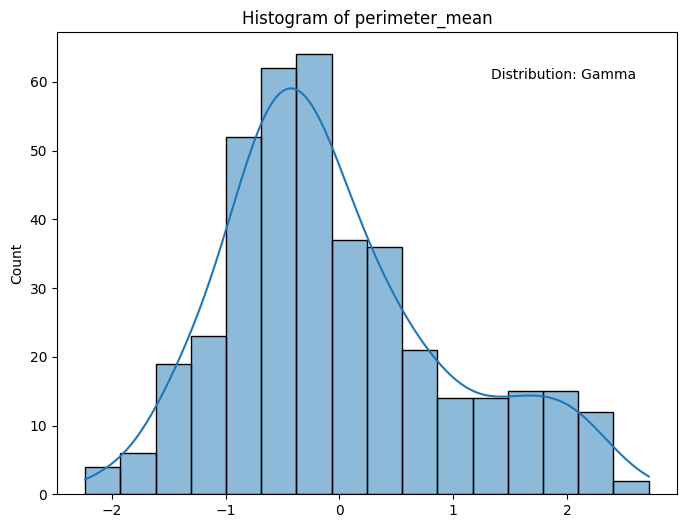

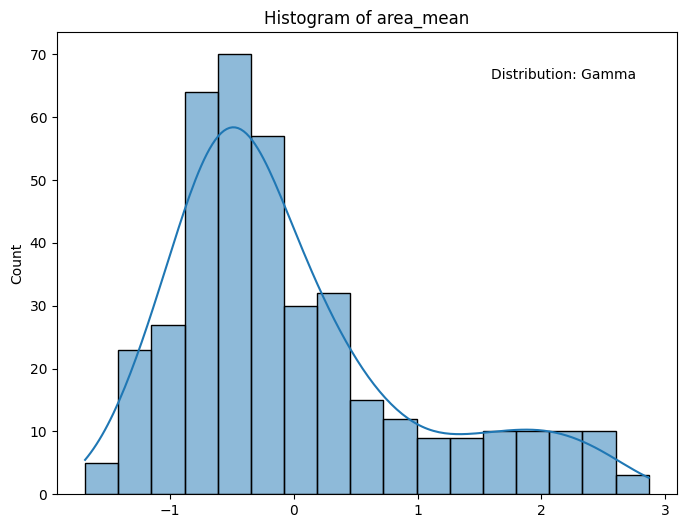

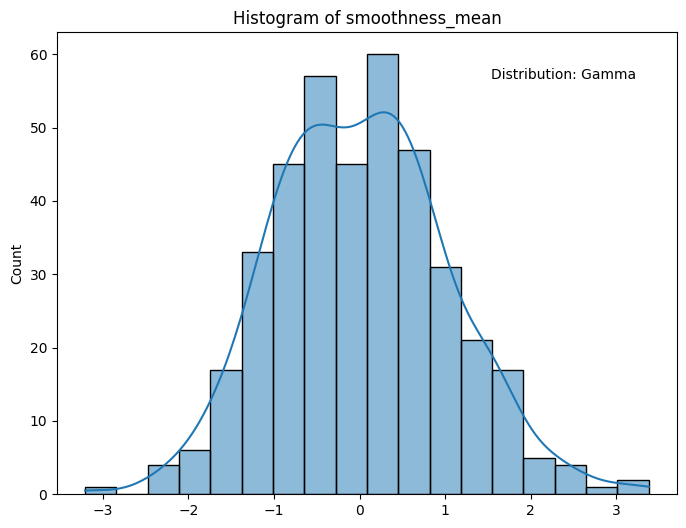

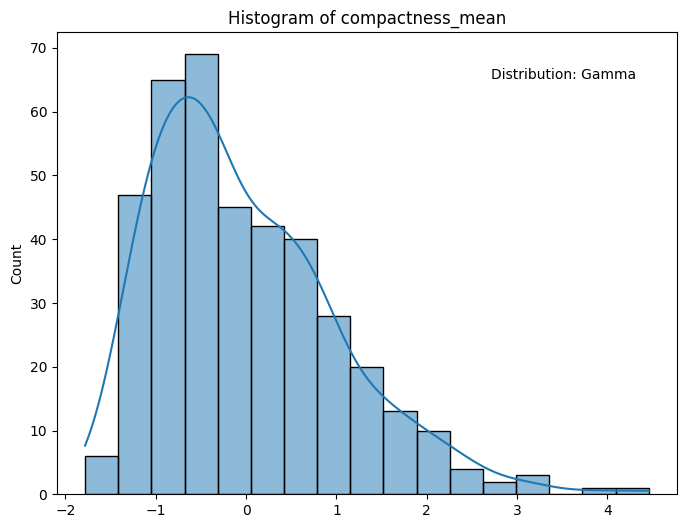

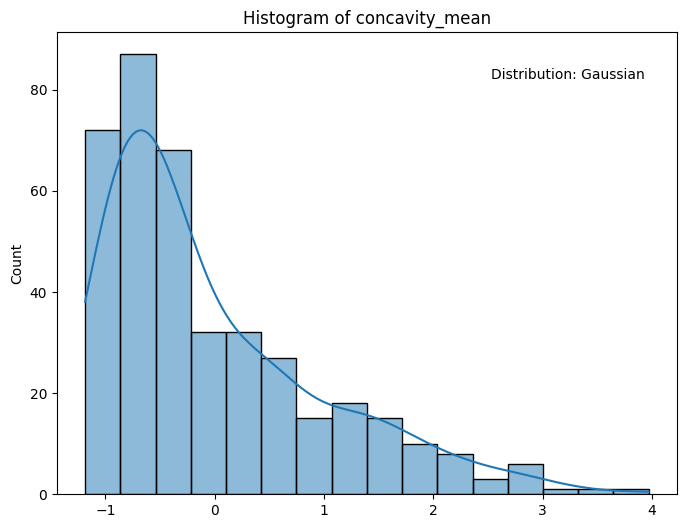

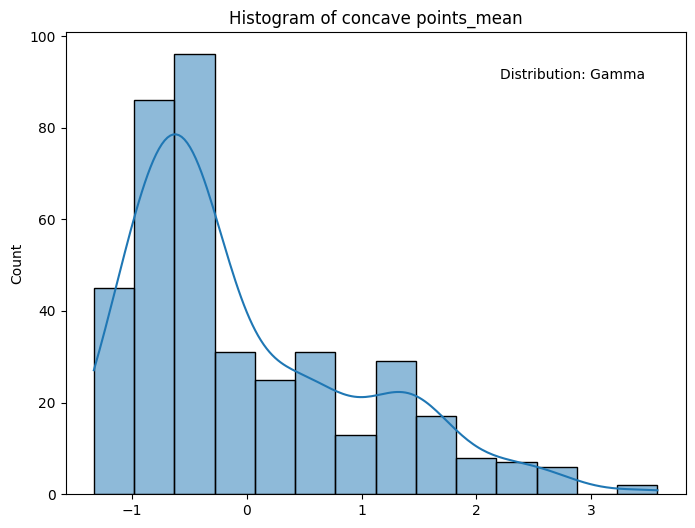

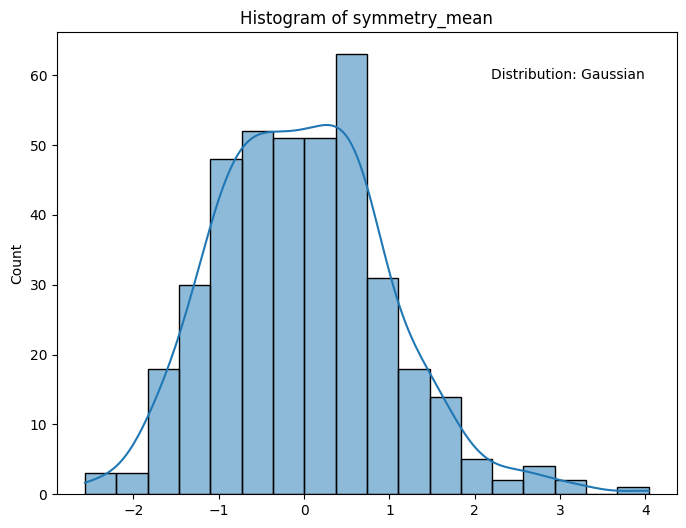

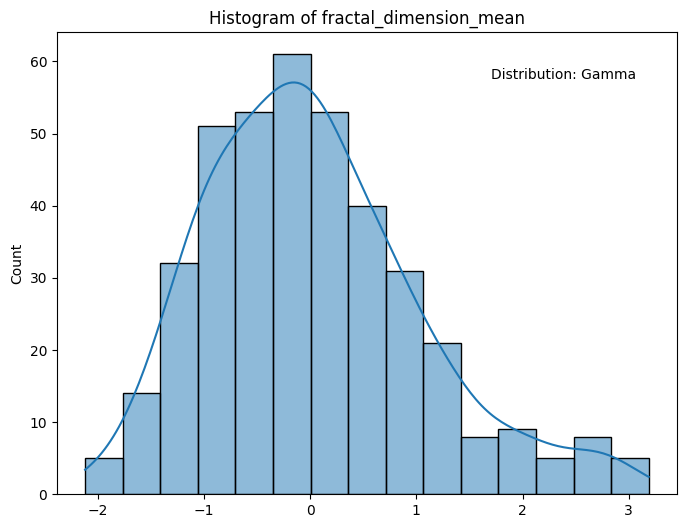

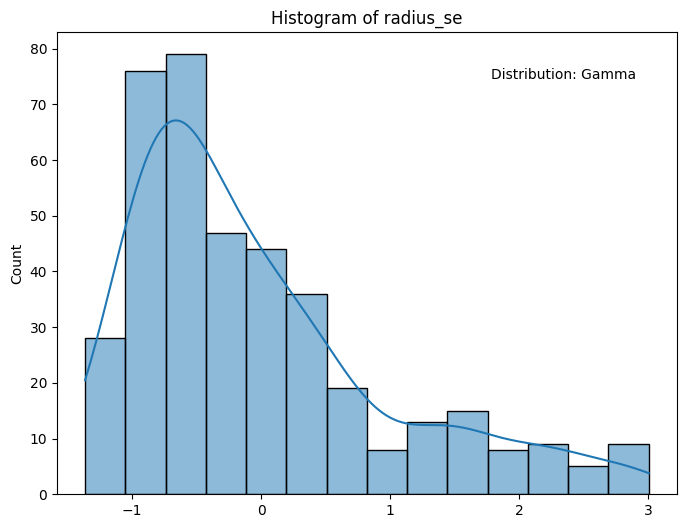

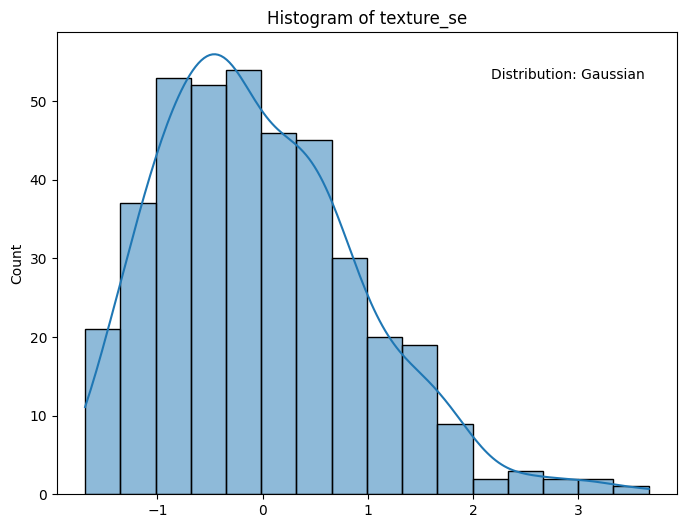

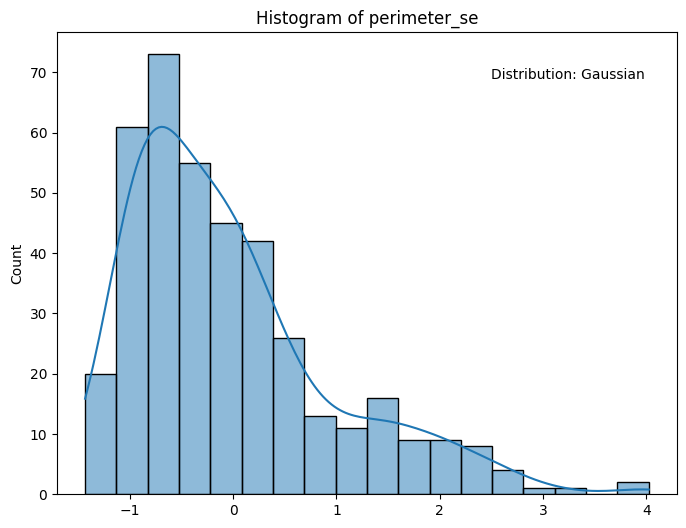

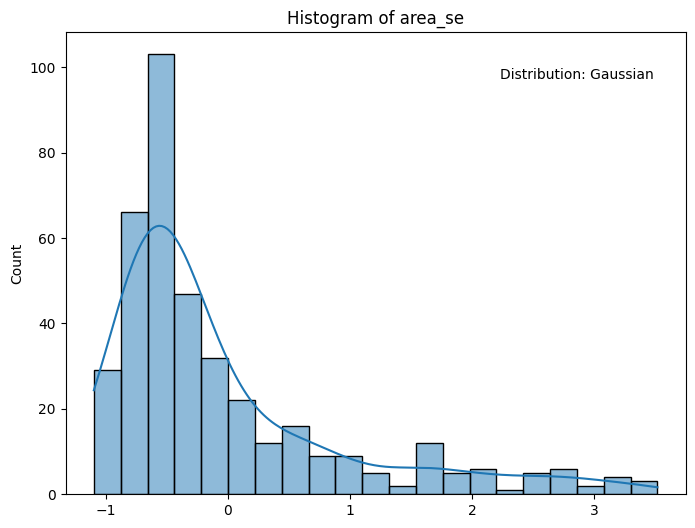

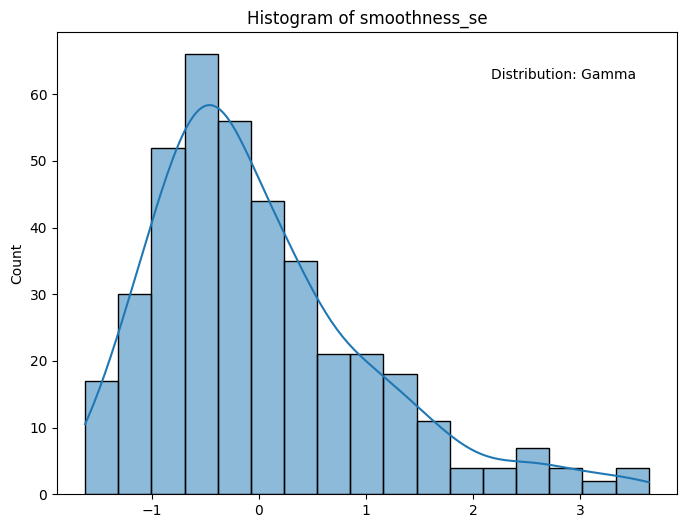

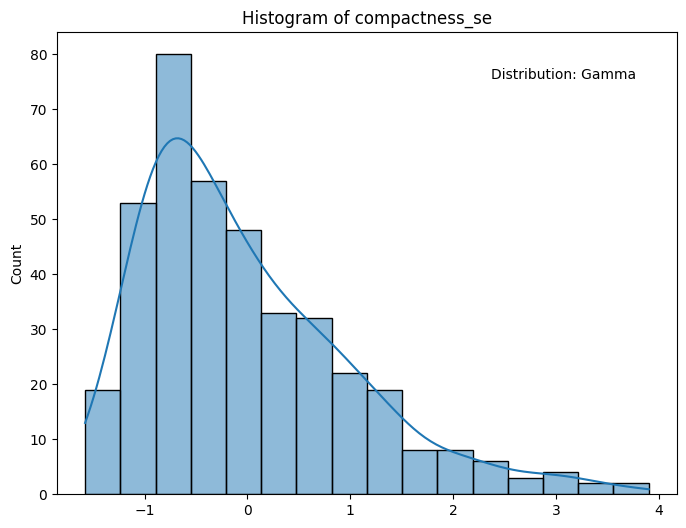

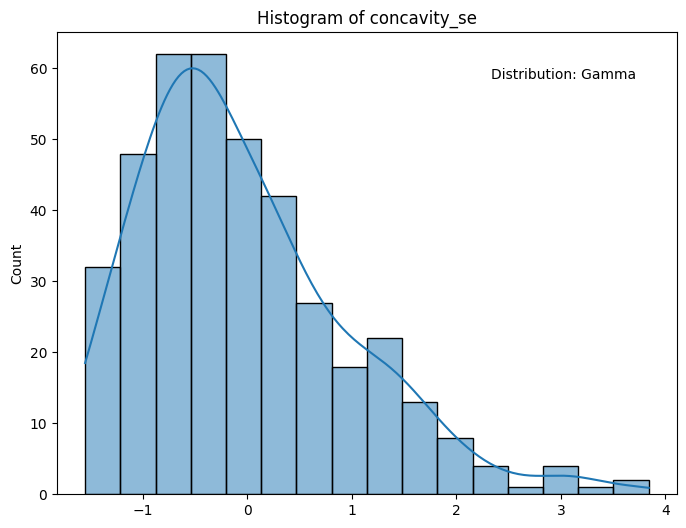

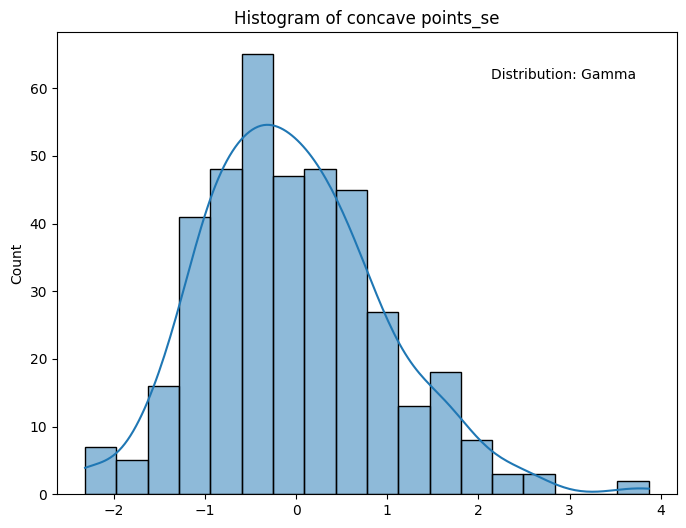

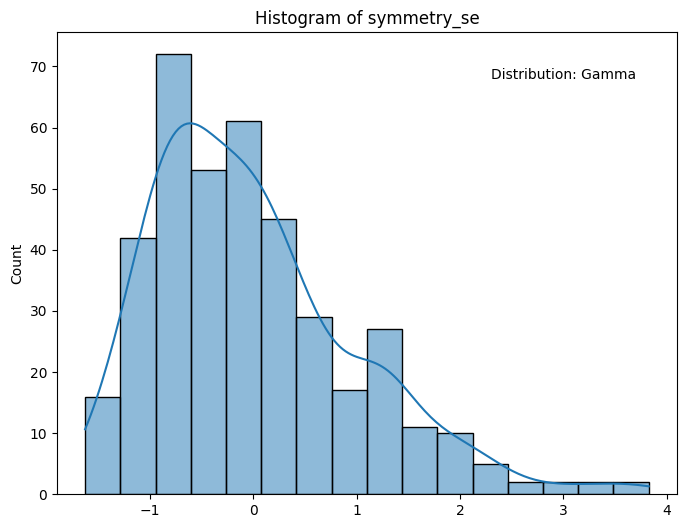

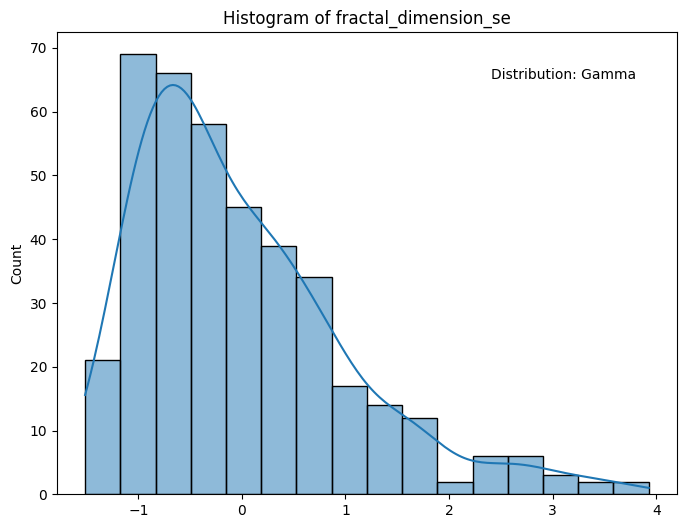

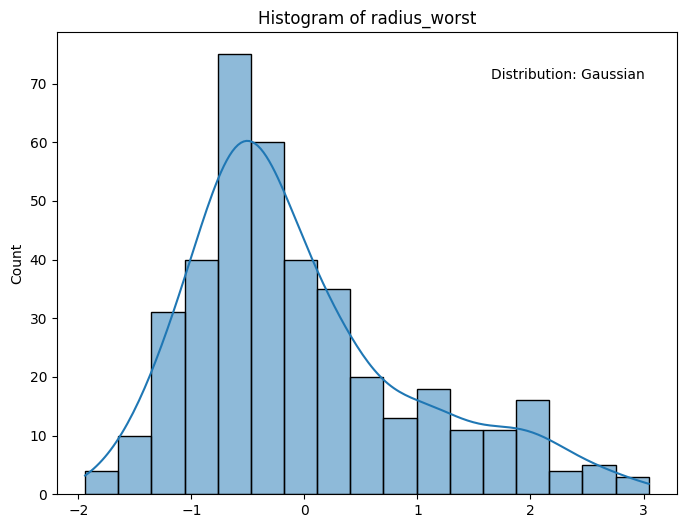

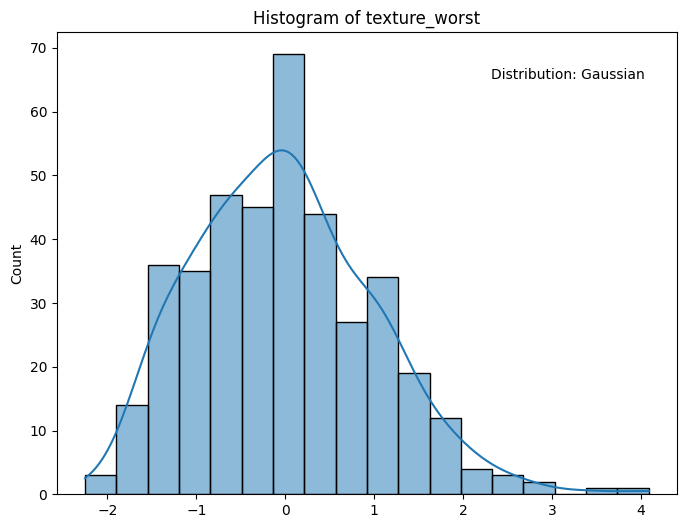

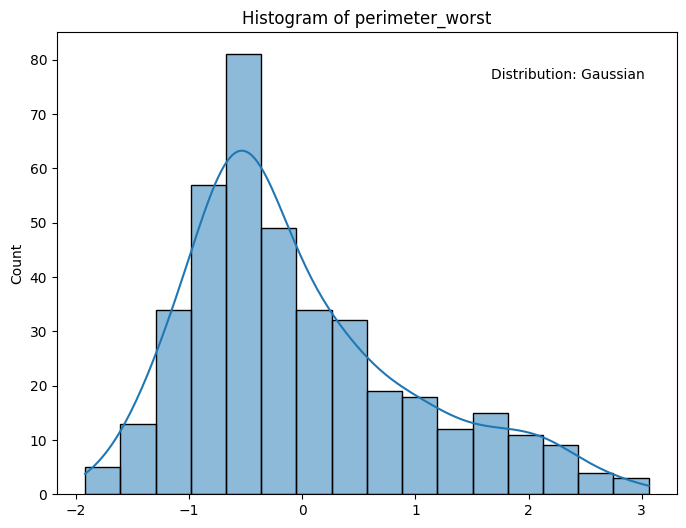

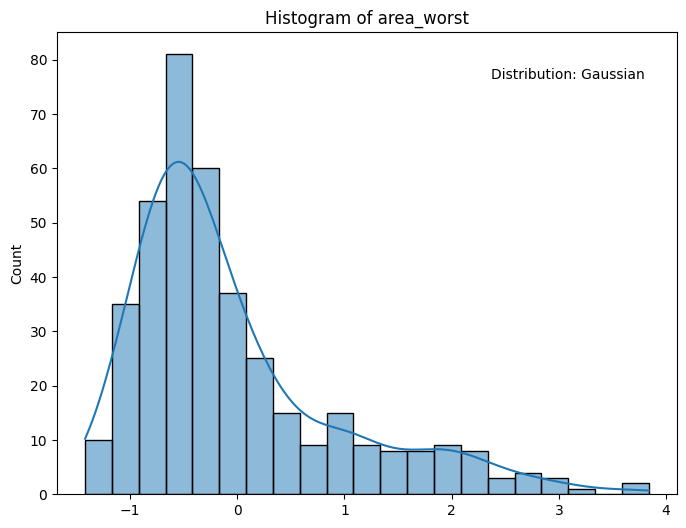

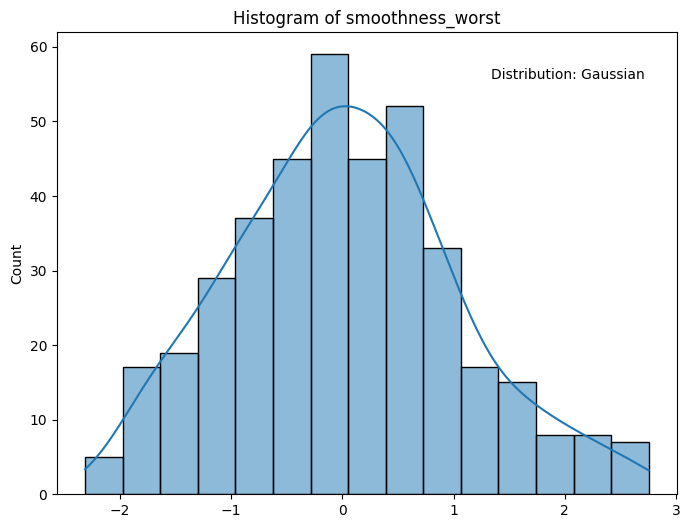

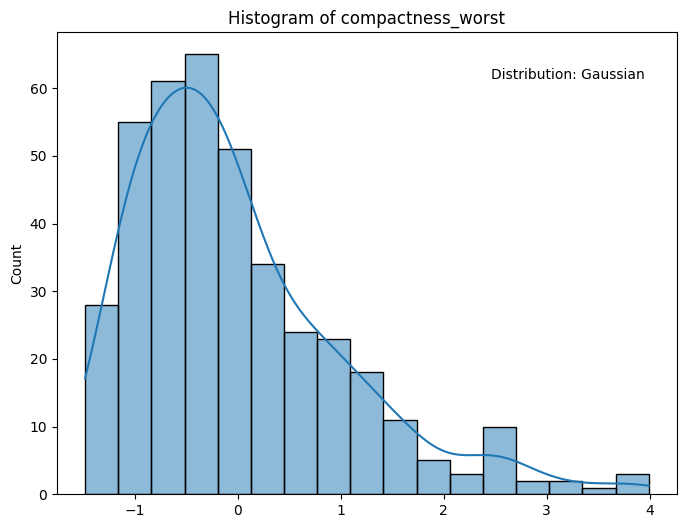

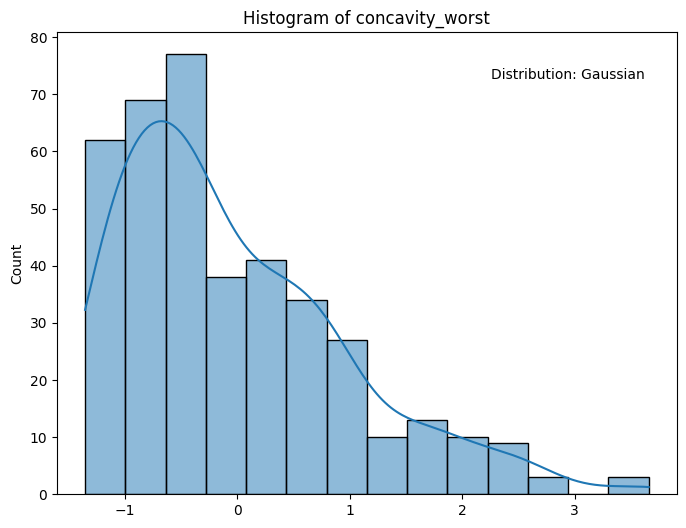

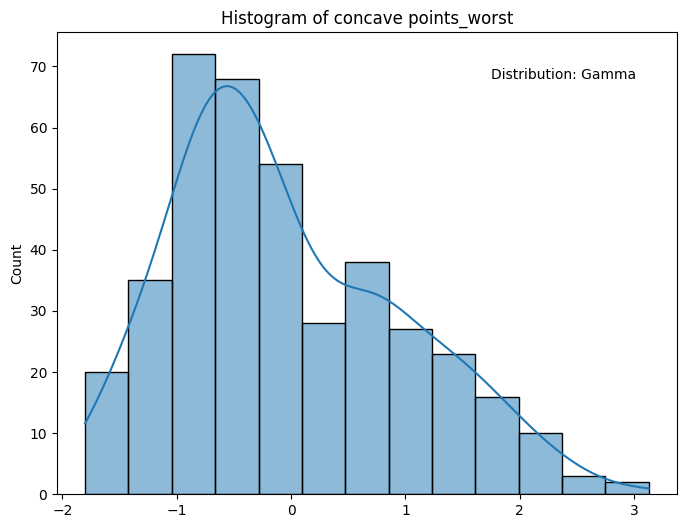

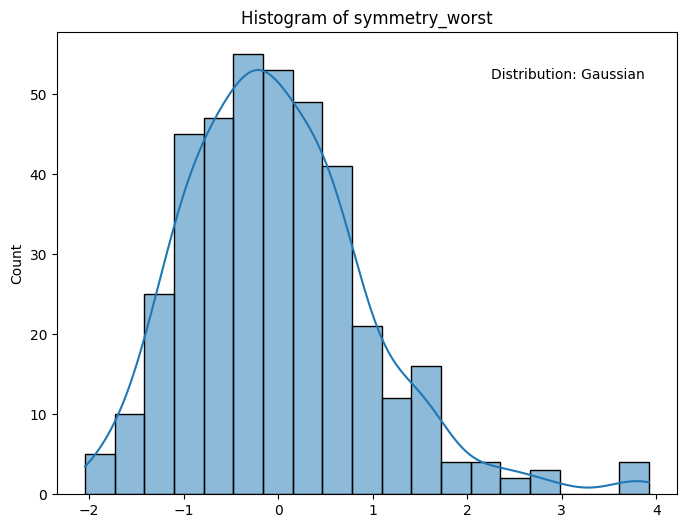

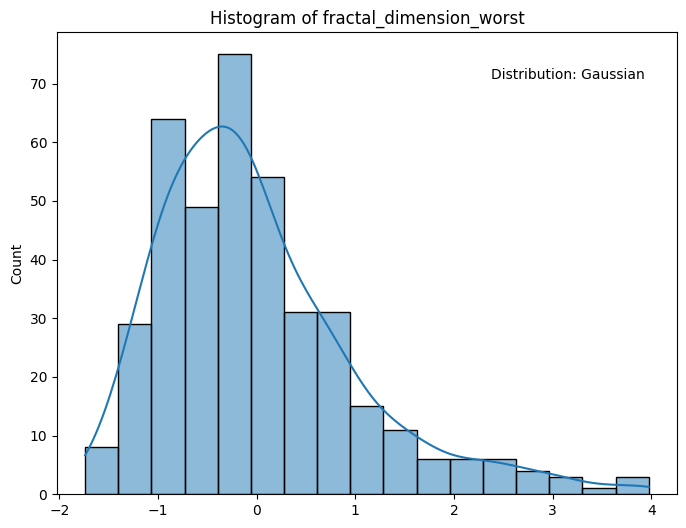

In [ ]:
# Loop over all features in the dataset

for feature in range(x_train.shape[1]):
    # feature = f"Feature {feature}"
    featureData = pd.Series(x_train[:, feature])
    plt.figure(figsize=(8, 6))
    sns.histplot(data=featureData,  kde=True)
    plt.title(f"Histogram of {names[feature]}")

    # Perform Shapiro-Wilk test for normality
    _, p_value = stats.shapiro(x_train[feature])

    if p_value > 0.05:
        distribution = "Gaussian"
    else:
        # Perform Anderson-Darling test for exponential distribution
        ad_statistic, crit_values, _ = stats.anderson(x_train[feature], dist='expon')

        if ad_statistic < crit_values[2]:
            distribution = "Exponential"
        else:
            distribution = "Gamma"

    plt.text(0.7, 0.9, f"Distribution: {distribution}", transform=plt.gca().transAxes)
    plt.show()

## Normal Distribution Test using p-value

$Shapiro-Wilk Test$

$H_0:$ The data follows a normal distribution

$H_1:$ The data does not follow a normal distribution

$Test Statistic (W) > Critical Value:$ Fail to reject $H_0$ (data is normally distributed)

$Test Statistic (W) <= Critical Value:$ Reject $H_0$ (data is not normally distributed)

$$W=\frac{\left(\sum_{i=1}^{n} a_i x_{(i)}\right)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$$

In [ ]:
set_normal, set_not = [], [] #two lists to store features after test
for feature in range(x_train.shape[1]):

  stat, p_value = shapiro(x_train[:, feature]) #calc p-value

  if p_value > 0.05: #testing the hypothesis
    set_normal.append(names[feature])
  else:
    set_not.append(names[feature])


#Printing the "NONE" Normally Distributed Features

print('The', end='')
for i in range(len(set_not)):
    print(f' "{set_not[i]}", ', end='')
    if(i==len(set_not)-1 and i!=0):
      print("are not normally distributed.")
    elif(i==len(set_not)-1):
      print("is not normally distributed.")

#Printing the Normally Distributed Features

print('The', end='')
for i in range(len(set_normal)):
    print(f' "{set_normal[i]}" ', end='')
    if(i==len(set_normal)-1 and i!=0):
      print("are normally distributed.")
    elif(i==len(set_normal)-1):
      print("is normally distributed.")

The "radius_mean",  "texture_mean",  "perimeter_mean",  "area_mean",  "compactness_mean",  "concavity_mean",  "concave points_mean",  "symmetry_mean",  "fractal_dimension_mean",  "radius_se",  "texture_se",  "perimeter_se",  "area_se",  "smoothness_se",  "compactness_se",  "concavity_se",  "concave points_se",  "symmetry_se",  "fractal_dimension_se",  "radius_worst",  "texture_worst",  "perimeter_worst",  "area_worst",  "smoothness_worst",  "compactness_worst",  "concavity_worst",  "concave points_worst",  "symmetry_worst",  "fractal_dimension_worst", are not normally distributed.
The "smoothness_mean" is normally distributed.


##The conditional distributions of each feature

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


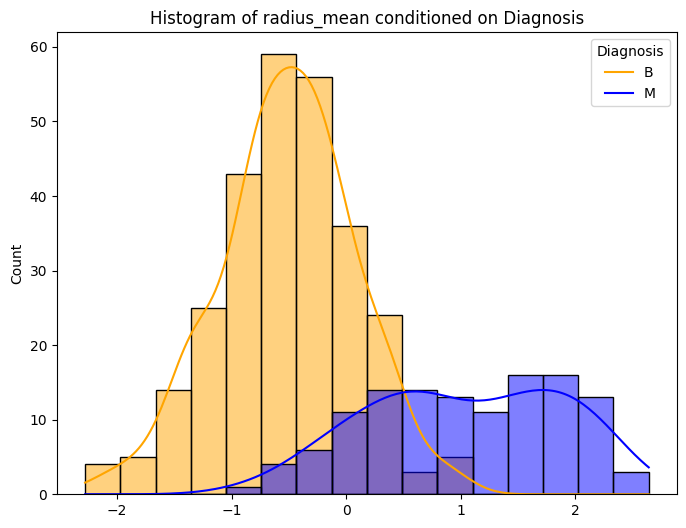

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


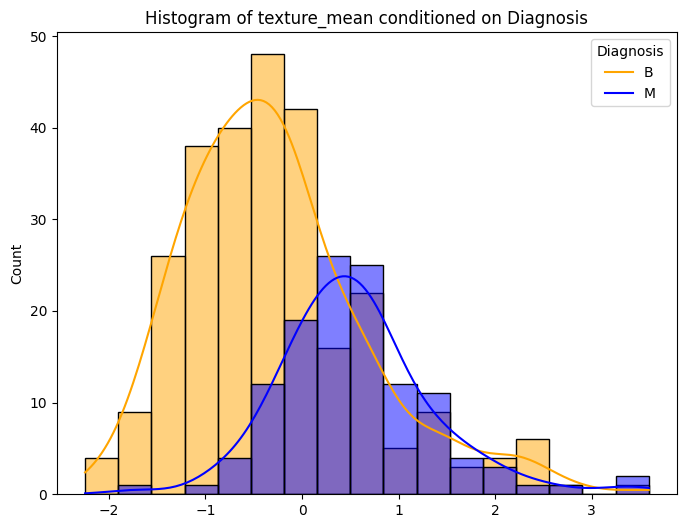

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


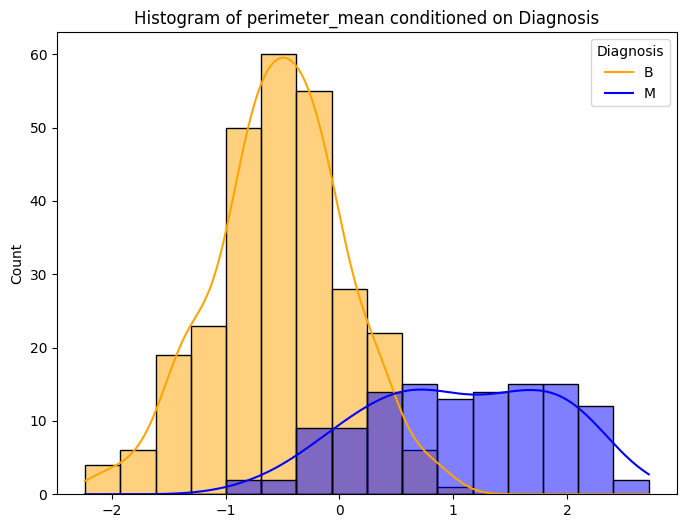

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


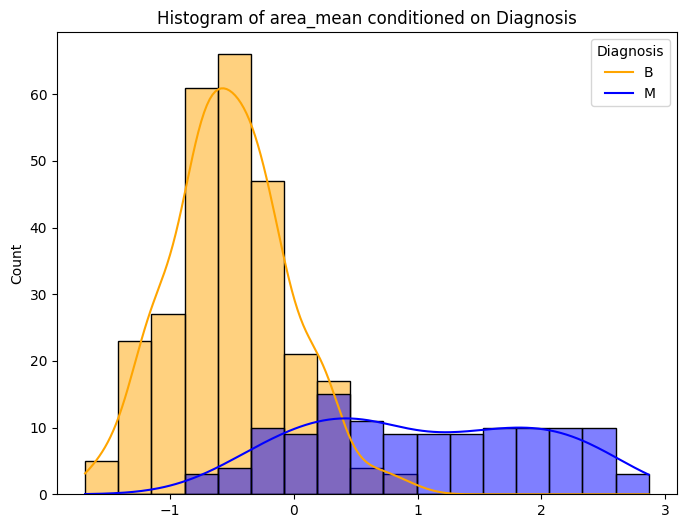

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


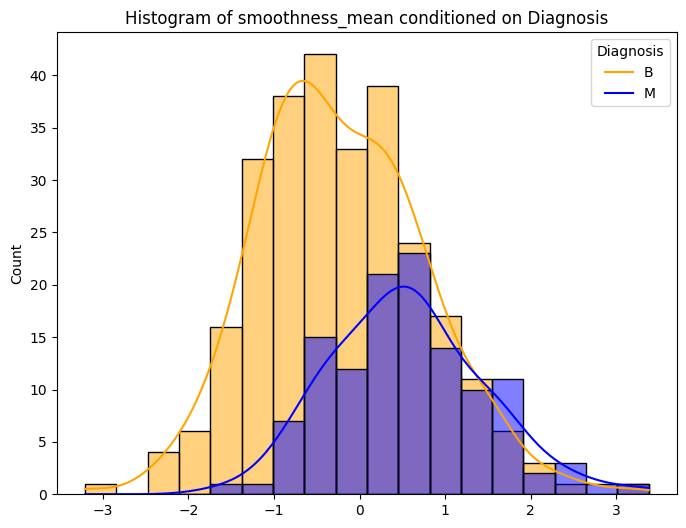

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


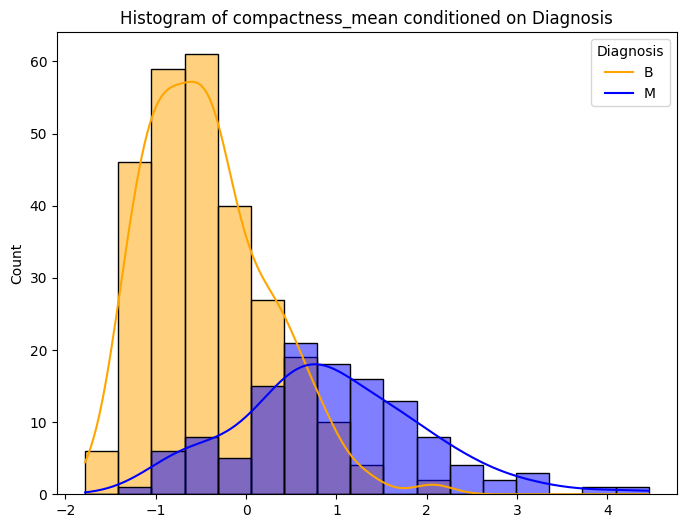

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


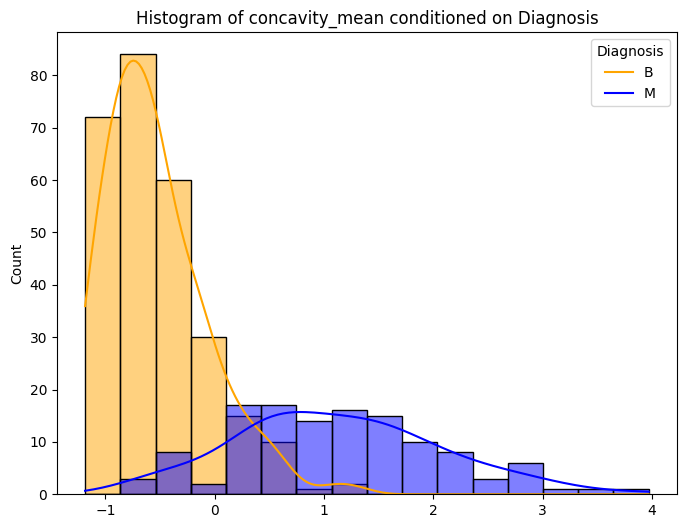

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


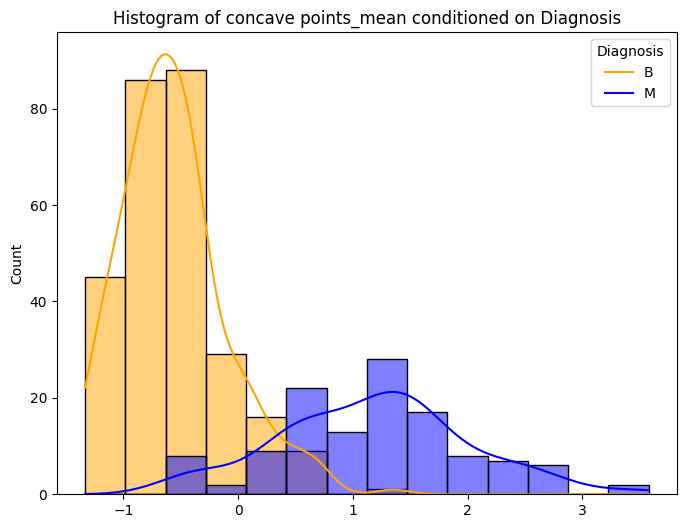

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


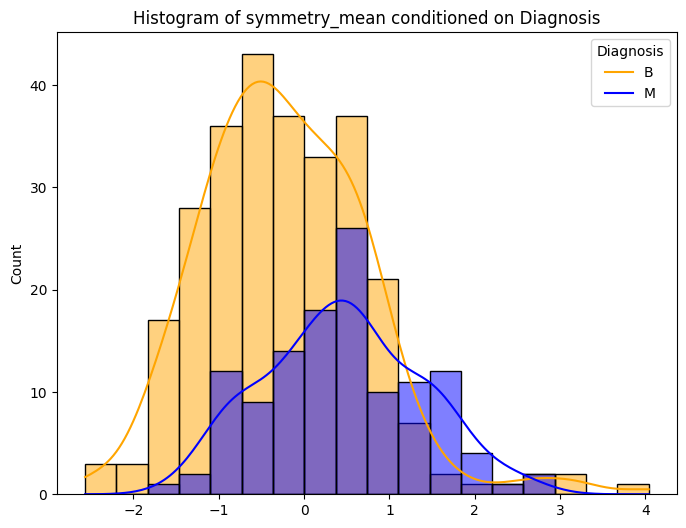

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


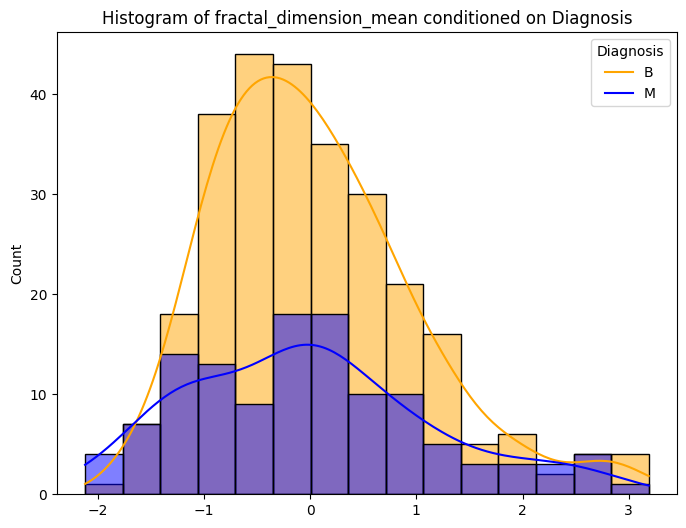

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


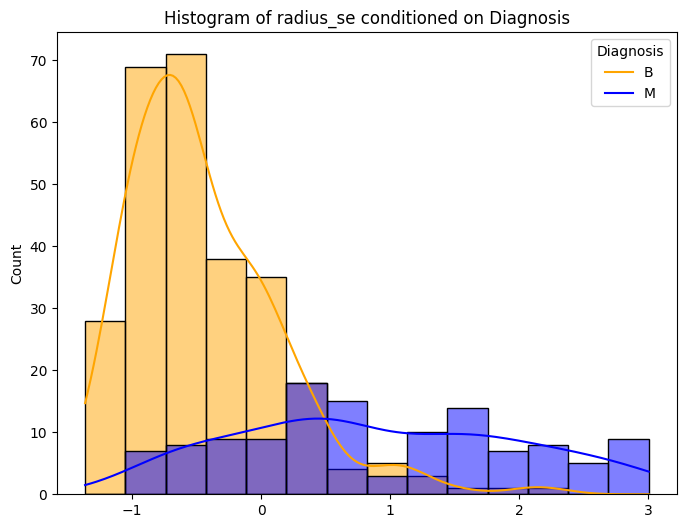

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


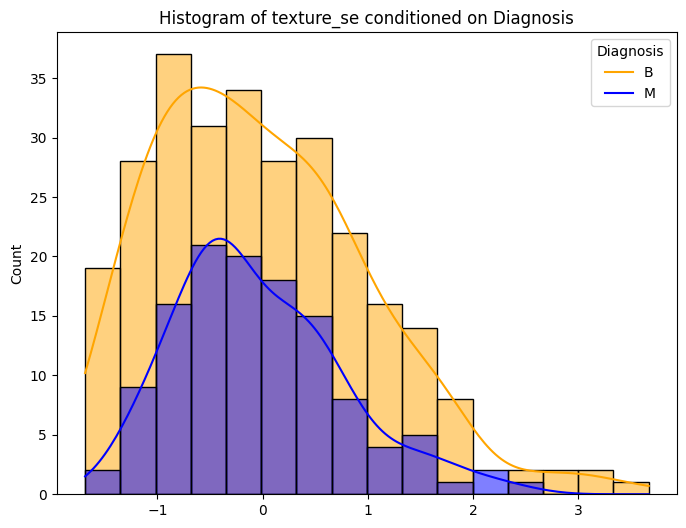

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


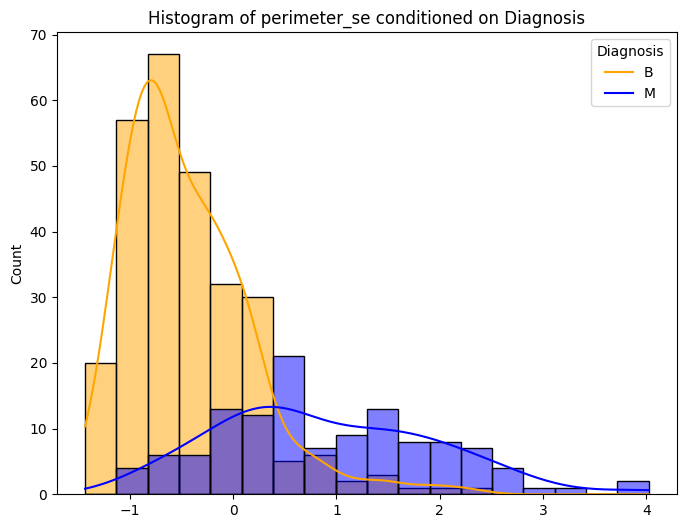

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


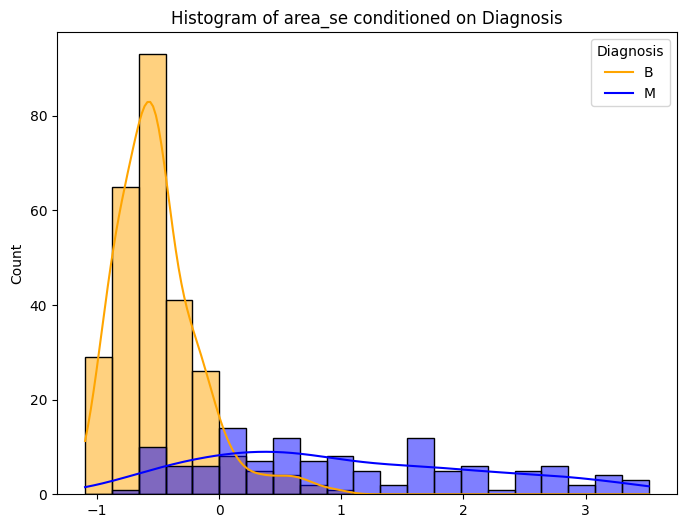

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


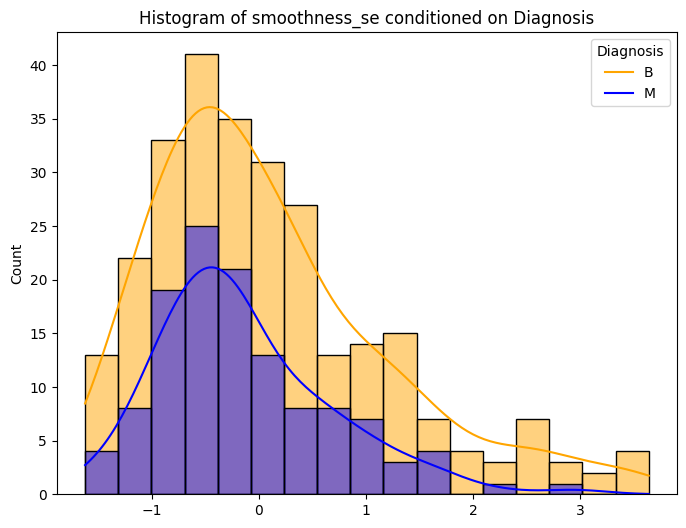

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


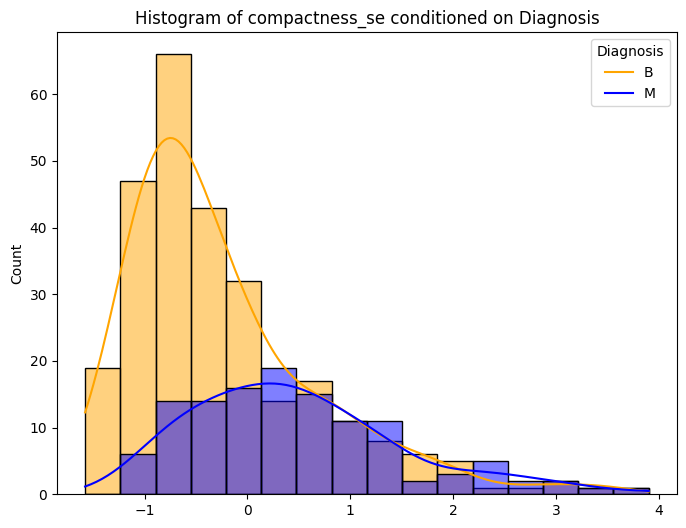

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


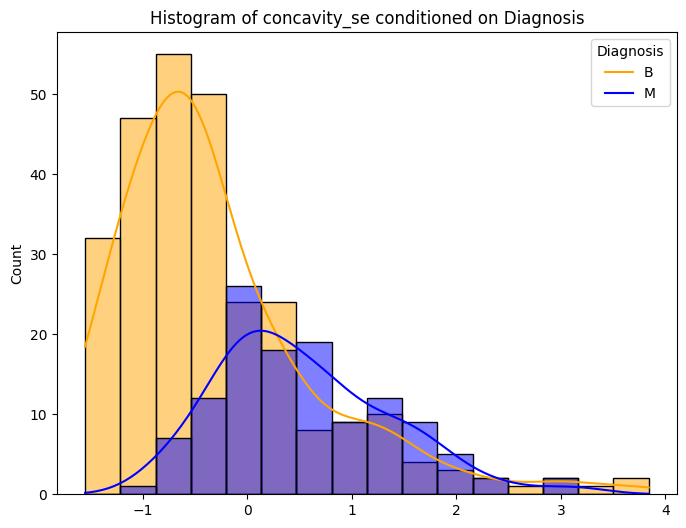

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


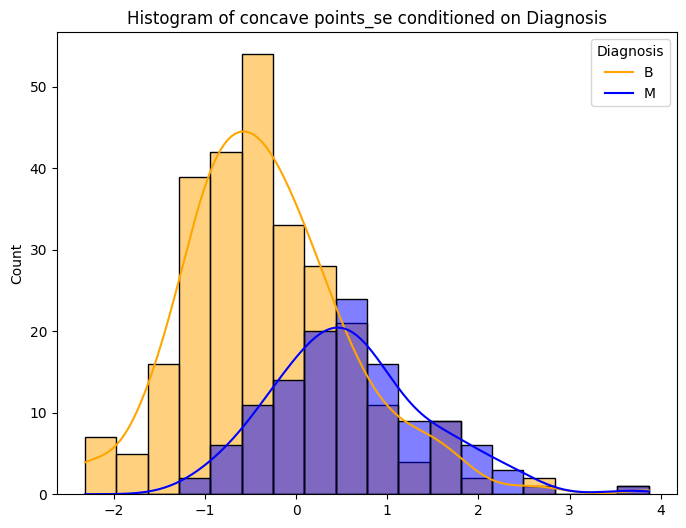

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


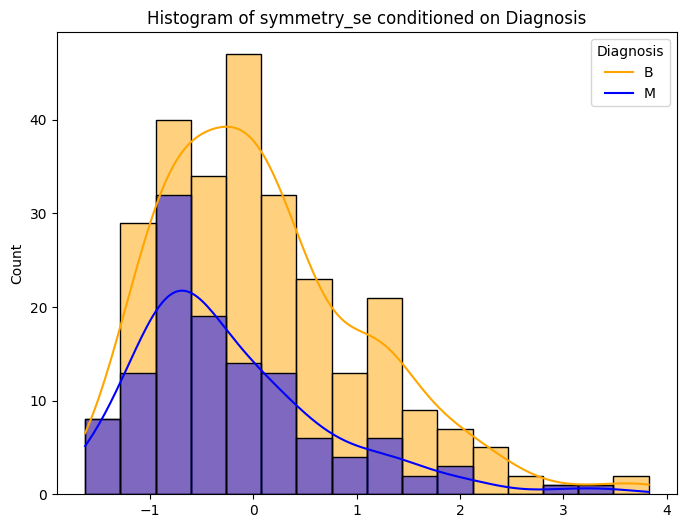

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


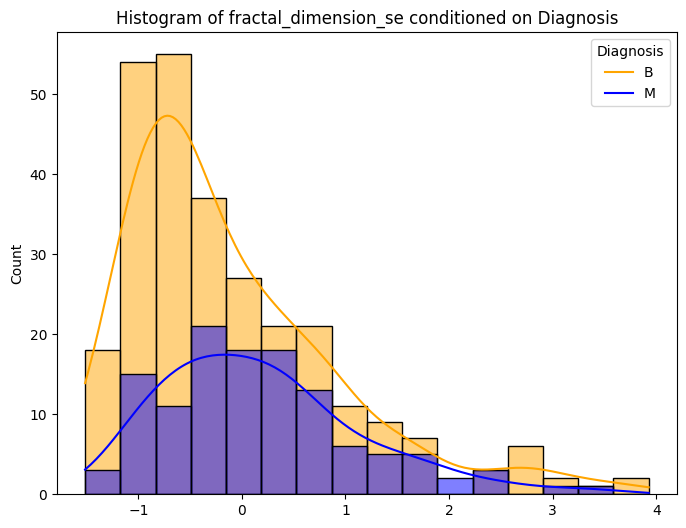

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


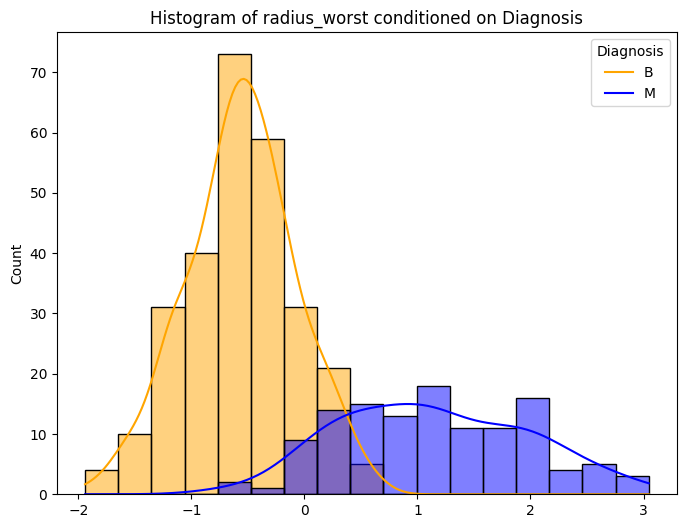

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


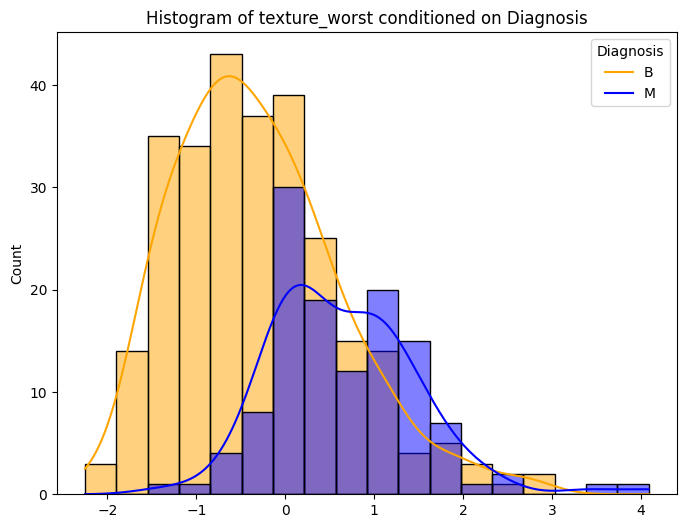

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


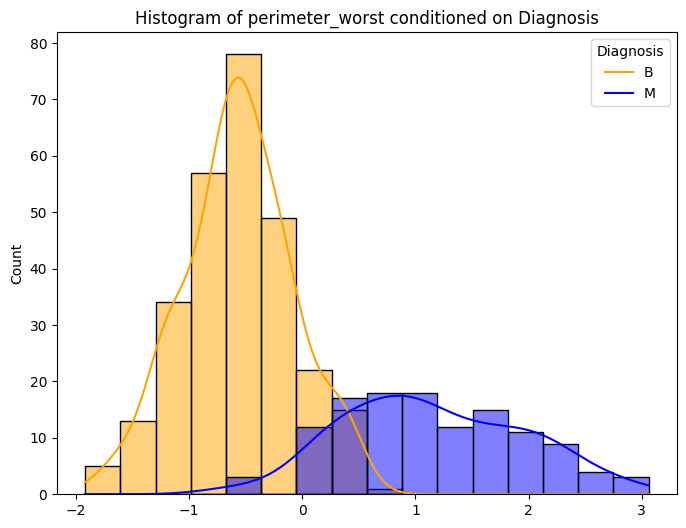

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


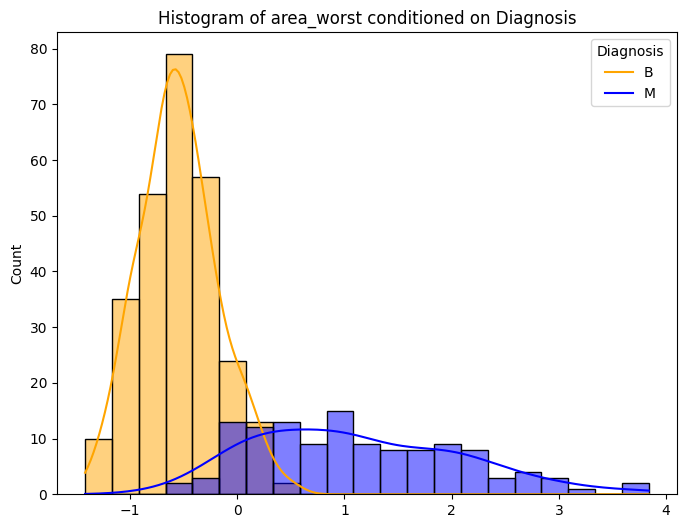

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


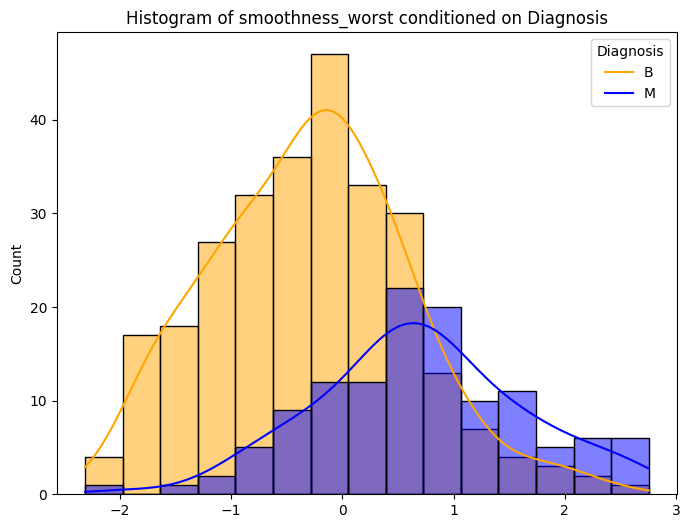

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


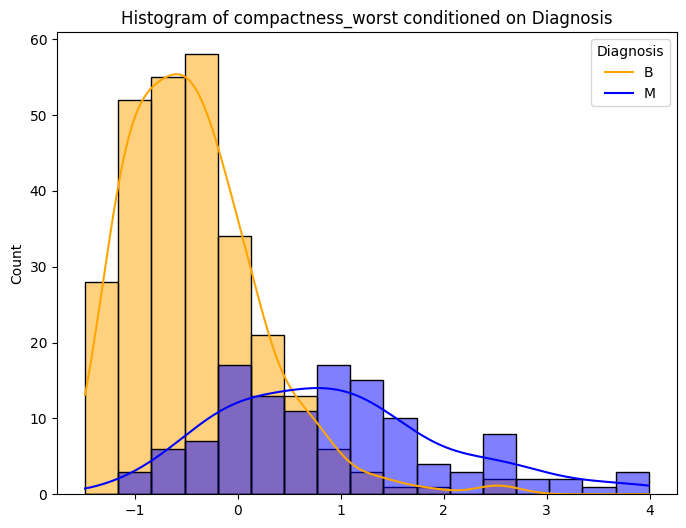

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


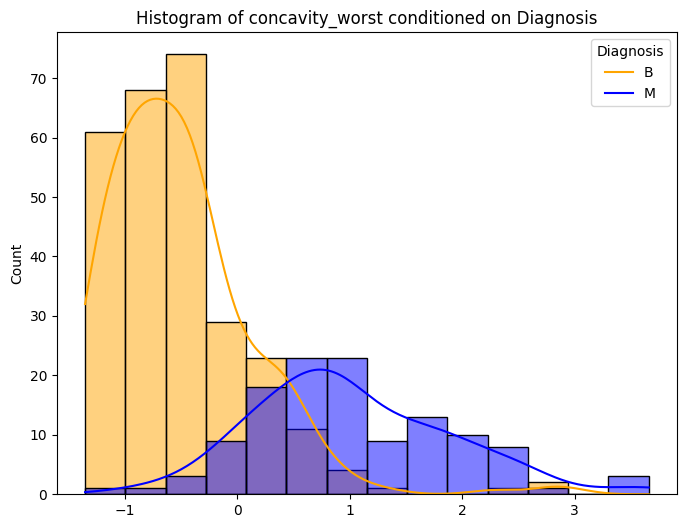

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


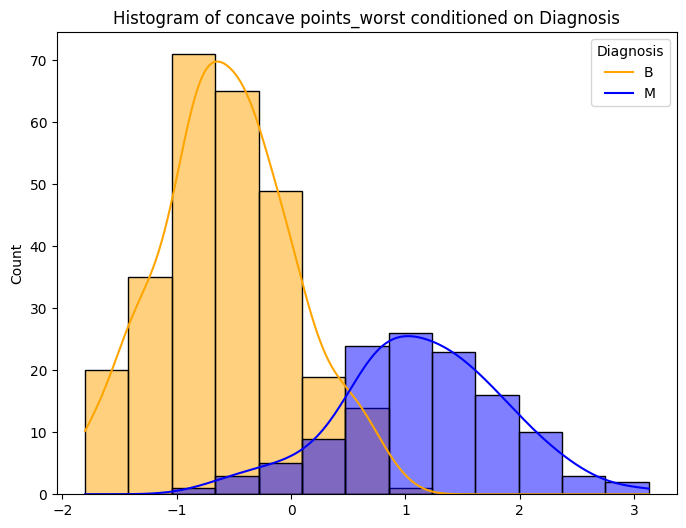

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


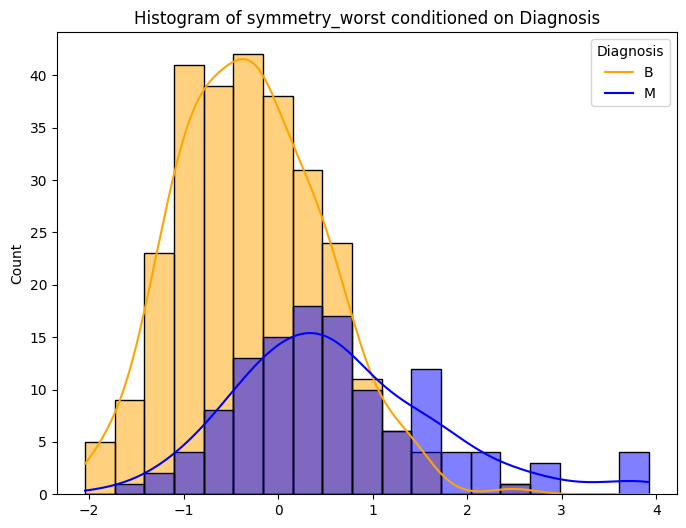

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


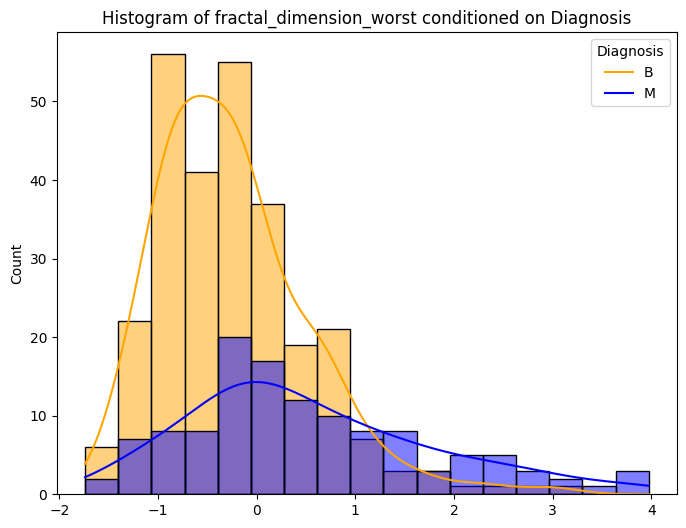

In [ ]:
color_palette = {'M': 'blue', 'B': 'orange'}
for feature in range(x_train.shape[1]):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=x_train, x=x_train[:, feature], hue=y_train.tolist(), kde=True, palette=color_palette)
    plt.title(f"Histogram of {names[feature]} conditioned on Diagnosis")
    plt.legend(title='Diagnosis', labels=['B', 'M'])
    plt.show()

##Naive Bayes Classifier

$$ Bayes' \, \,Theorem:  P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $$
$$ x_1, \ldots, x_j \text{ are j features that are independent of each other. y is the dependent variable}.
\begin{align*}
*P(y|x_1,\ldots, x_j) &: \text{Posterior Probability} \
P(x_1, \ldots, x_j|y) &: \text{Likelihood of features } x_1 \text{ to } x_j \text{ given that their class is } y. \
P(y) &: \text{Prior Probability} \
P(x_1, \ldots, x_j) &: \text{Marginal Probability}
\end{align*} $$


In [ ]:
class NaiveBayes:

    def fitting(self, X, y):

        self.m, self.n = X.shape        # Get the number of samples, number of features respectively
        self.unique_classes = np.unique(y)        # Get the unique elements in y (class labels)
        self.n_unique = len(self.unique_classes)         # Get the number of unique classes

        # Create empty arrays to store mean, variance, and priors
        self.mean = np.zeros((self.n_unique, self.n))
        self.variance = np.zeros((self.n_unique, self.n))
        self.priors = np.zeros(self.n_unique)

        for i, c in enumerate(self.unique_classes):

            X_c = X[y == c]              # Get the portion of the data where y is equal to a certain class
            self.mean[i, :] = np.mean(X_c, axis=0)               # Calculate the mean for each class and all features
            self.variance[i, :] = np.var(X_c, axis=0)               # Calculate the variance for each class and all features
            self.priors[i] = X_c.shape[0] / self.m              # Calculate the priors

    def pdf(self, x, c):

        # Get the mean and the variance for the specified class
        mean = self.mean[c]
        variance = self.variance[c]

        # Calculate the Gaussian density function
        constant = 1 / np.sqrt(variance * 2 * np.pi)
        expo = np.exp(-0.5 * ((x - mean) ** 2 / variance))

        return constant * expo

    def get_posterior(self, x):

        posteriors = []             # Create an empty list to store the posteriors

        for i, c in enumerate(self.unique_classes):

            prior = np.log(self.priors[i])

            likehood = np.sum(np.log(self.pdf(x, i)))            # Calculate the new likehood and append it to the list
            posterior = likehood + prior
            posteriors.append(posterior)

        return self.unique_classes[np.argmax(posteriors)]           # Return the class with the highest class probability

    def predict(self, X):

        predictions = []          # Create an empty array to store the predictions

        # Loop over each sample in X
        for i in X:

            predicted = self.get_posterior(i)             # Get the prediction for this sample
            predictions.append(predicted)            # Append the prediction to the predictions list

        return np.array(predictions)

def accuracy(y_true, y_pred):

    total_samples = len(y_true)
    correct = np.sum(y_true == y_pred)
    return (correct / total_samples)

##Testing our Model:

In [ ]:
model = NaiveBayes()
model.fitting(x_train, y_train)
predictions = model.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

accuracy(y_test, predictions)

[[58  3]
 [ 4 34]]


0.9292929292929293

##Comparing Accuracies:

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

sk_model = GaussianNB()

# Train the model using the training sets
sk_model.fit(x_train, y_train)

#Predict Output
sk_predictions = sk_model.predict(x_test)

#Get the prediction accuracy

accuracy_score(y_test, sk_predictions)

0.9292929292929293